In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

In [2]:
data = pd.read_excel('Base de datos v1.xlsx')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_Cliente               20000 non-null  int64  
 1   Edad                     19700 non-null  float64
 2   Genero                   20000 non-null  object 
 3   Estado_Civil             20000 non-null  object 
 4   Ingreso_Mensual          19500 non-null  float64
 5   Transacciones_Mensuales  20000 non-null  int64  
 6   Monto_Promedio_Compra    19800 non-null  float64
 7   Uso_Linea_Credito_Pct    20000 non-null  float64
 8   Pagos_Atrasados          20000 non-null  int64  
 9   Antiguedad_Meses         20000 non-null  int64  
 10  Productos_Adicionales    20000 non-null  int64  
 11  Fuga                     20000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1.8+ MB


In [4]:
data.describe()

,ID_Cliente,Edad,Ingreso_Mensual,Transacciones_Mensuales,Monto_Promedio_Compra,Uso_Linea_Credito_Pct,Pagos_Atrasados,Antiguedad_Meses,Productos_Adicionales,Fuga
count,20000.000000,19700.000000,19500.000000,20000.000000,19800.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000
mean,10000.500000,40.187360,4006.623795,31.496050,519.013752,0.285052,0.802350,35.80920,1.088500,0.185350
std,5773.647028,11.628559,2848.305669,31.443938,413.345305,0.159271,0.894217,35.80716,1.204259,0.388591
min,1.000000,18.000000,200.000000,12.000000,23.540000,0.000000,0.000000,1.00000,0.000000,0.000000
25%,5000.750000,32.000000,1916.000000,26.000000,252.875000,0.160000,0.000000,10.00000,0.000000,0.000000
50%,10000.500000,40.000000,3351.000000,30.000000,406.355000,0.260000,1.000000,25.00000,1.000000,0.000000
75%,15000.250000,48.000000,5373.000000,34.000000,647.460000,0.390000,1.000000,50.00000,2.000000,0.000000
max,20000.000000,75.000000,28733.000000,967.000000,6635.400000,0.900000,6.000000,240.00000,8.000000,1.000000


In [5]:
data.isnull().sum()/len(data)*100

ID_Cliente                 0.0
Edad                       1.5
Genero                     0.0
Estado_Civil               0.0
Ingreso_Mensual            2.5
Transacciones_Mensuales    0.0
Monto_Promedio_Compra      1.0
Uso_Linea_Credito_Pct      0.0
Pagos_Atrasados            0.0
Antiguedad_Meses           0.0
Productos_Adicionales      0.0
Fuga                       0.0
dtype: float64

## Imputación nulos

In [6]:
data.dropna(subset=['Edad', 'Ingreso_Mensual', 'Monto_Promedio_Compra'], inplace=True)

In [7]:
data.isnull().sum()/len(data)*100

ID_Cliente                 0.0
Edad                       0.0
Genero                     0.0
Estado_Civil               0.0
Ingreso_Mensual            0.0
Transacciones_Mensuales    0.0
Monto_Promedio_Compra      0.0
Uso_Linea_Credito_Pct      0.0
Pagos_Atrasados            0.0
Antiguedad_Meses           0.0
Productos_Adicionales      0.0
Fuga                       0.0
dtype: float64

## Análisis Univariado

### Variables cuanti

In [8]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

In [9]:
numeric_cols = numeric_cols.drop(['ID_Cliente','Fuga'])

In [10]:
from scipy.stats import skew, kurtosis, shapiro

def plot_numeric_distributions(data, numeric_cols):
    cols_per_row = 2
    n = len(numeric_cols)
    rows = -(-n // cols_per_row)

    plt.figure(figsize=(cols_per_row * 7, rows * 4))

    for idx, col in enumerate(numeric_cols, 1):
        sk = skew(data[col].dropna())
        kt = kurtosis(data[col].dropna())
        _, p = shapiro(data[col].dropna())

        plt.subplot(rows, cols_per_row*2, idx*2-1)
        sns.histplot(data[col], kde=True, bins=20, color="skyblue")
        plt.title(f"{col}\nSkew: {sk:.2f}, Kurt: {kt:.2f}, p={p:.2g}")

        plt.subplot(rows, cols_per_row*2, idx*2)
        sns.boxplot(y=data[col], color="lightcoral", showmeans=True)
        plt.title(f"{col} - Boxplot")

    plt.tight_layout()
    plt.show()

d:\MIERDA\data-mining-tools-activities\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19015.
  res = hypotest_fun_out(*samples, **kwds)
d:\MIERDA\data-mining-tools-activities\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19015.
  res = hypotest_fun_out(*samples, **kwds)
d:\MIERDA\data-mining-tools-activities\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19015.
  res = hypotest_fun_out(*samples, **kwds)
d:\MIERDA\data-mining-tools-activities\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19015.
  res = hypotest_fun_out(*samples, **kwds)
d:\M

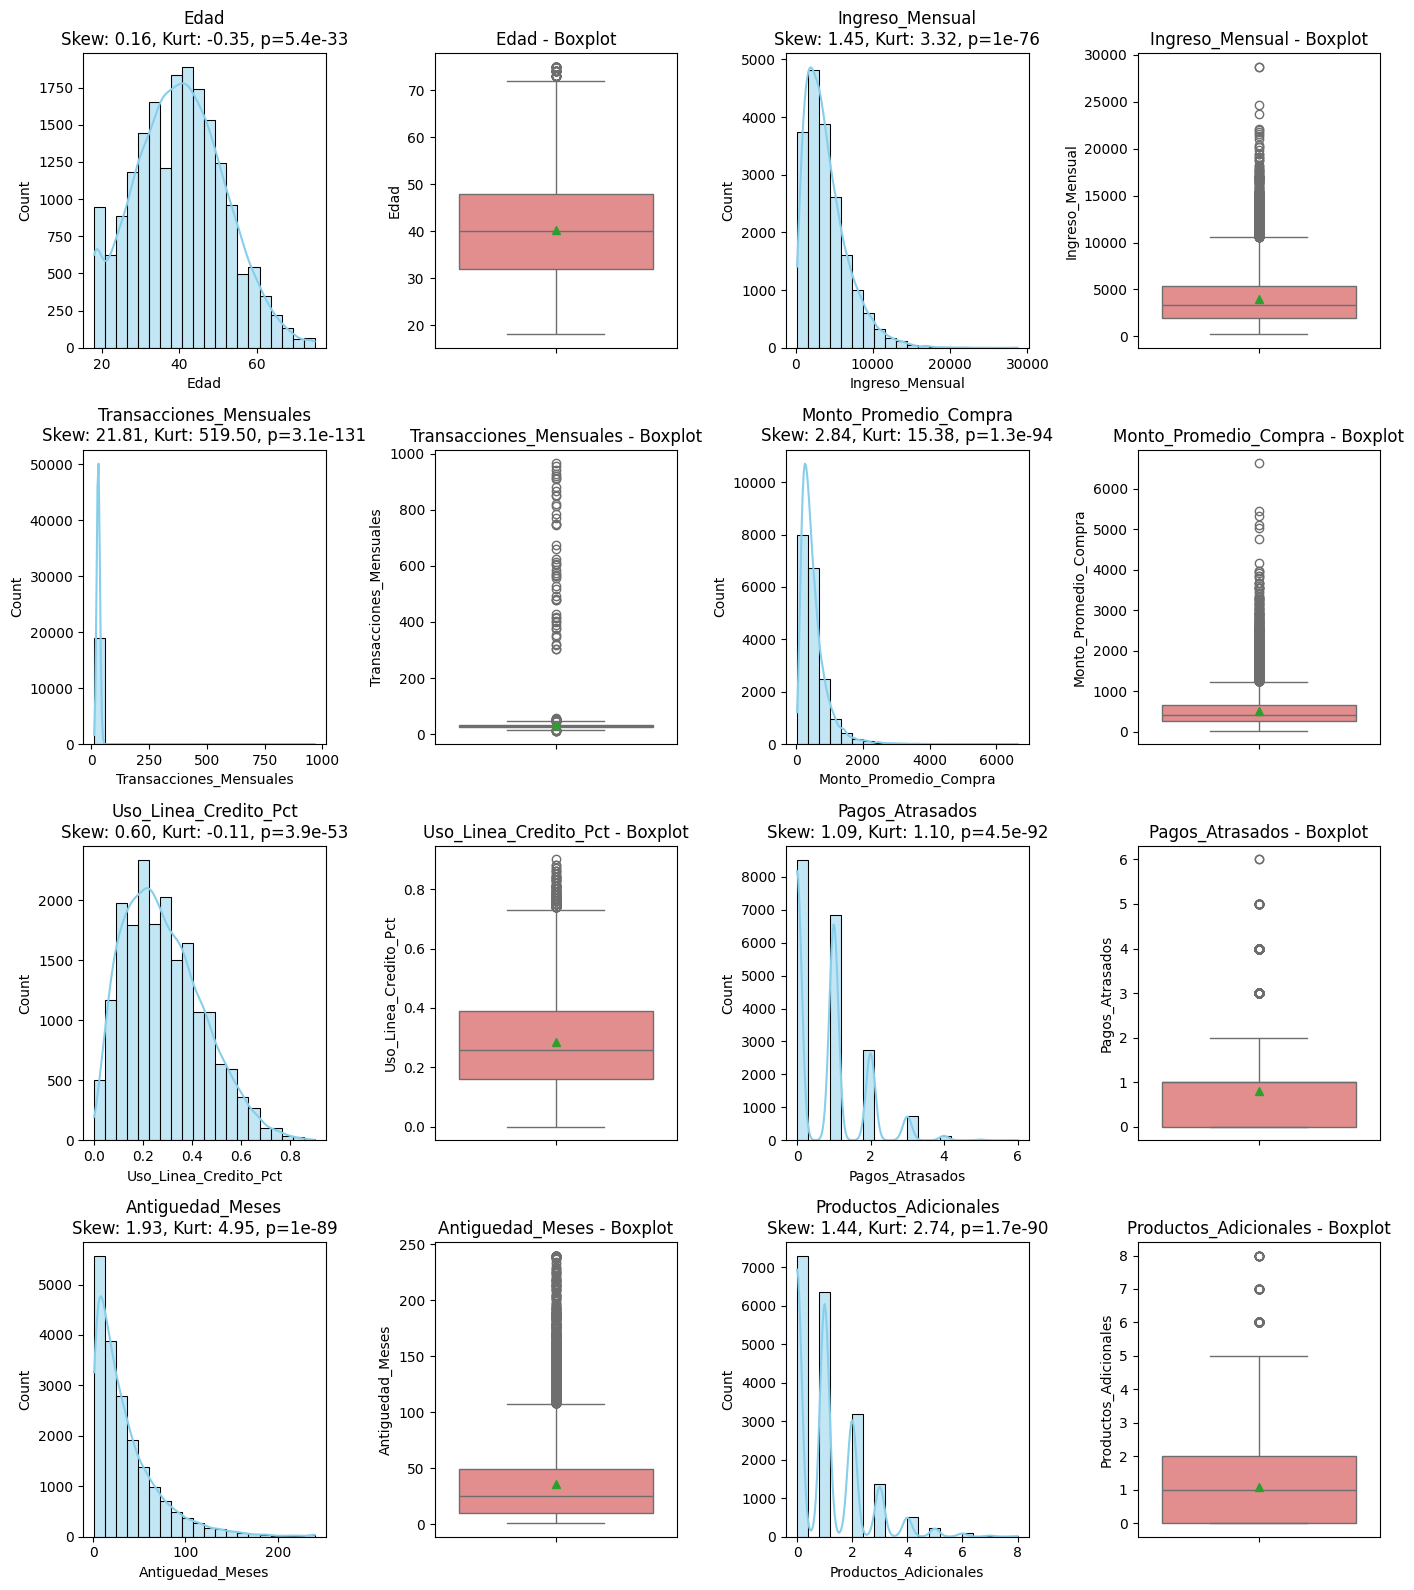

In [11]:
plot_numeric_distributions(data, numeric_cols)

Edad: distribución casi normal, sin valores extremos. La mayoría de clientes está entre 25 y 45 años.

Ingreso mensual: muy asimétrica a la derecha; pocos clientes con ingresos altos y muchos con ingresos bajos o medios.

Transacciones mensuales: extremadamente sesgada; la mayoría realiza pocas transacciones, con algunos casos atípicos muy altos.

Monto promedio de compra: también sesgada positivamente; muchos clientes compran por montos pequeños, pocos con montos muy grandes.

Uso de línea de crédito (%): ligera asimetría a la derecha; la mayoría utiliza menos del 50% de su línea.

Pagos atrasados: la mayoría tiene entre 0 y 1 atraso; pocos clientes con más atrasos (outliers).

Antigüedad (meses): la mayoría de clientes es reciente; pocos con larga antigüedad.

Productos adicionales: distribución discreta; la mayoría tiene 1 o ningún producto adicional.



## Variables cuali

In [11]:
categorical_cols = [col for col in data.select_dtypes(include=['object', 'category']).columns if col != 'Fuga']
categorical_cols.append('Pagos_Atrasados')
categorical_cols.append('Productos_Adicionales')

In [12]:
def plot_categorical_distributions(data, categorical_cols):
    cols_per_row = 3
    n = len(categorical_cols)
    rows = -(-n // cols_per_row)

    plt.figure(figsize=(cols_per_row * 6, rows * 4))

    for idx, col in enumerate(categorical_cols, 1):
        plt.subplot(rows, cols_per_row, idx)
        sns.countplot(data=data, x=col, hue=col, palette="Set2")
        plt.title(f"{col} Distribution")
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

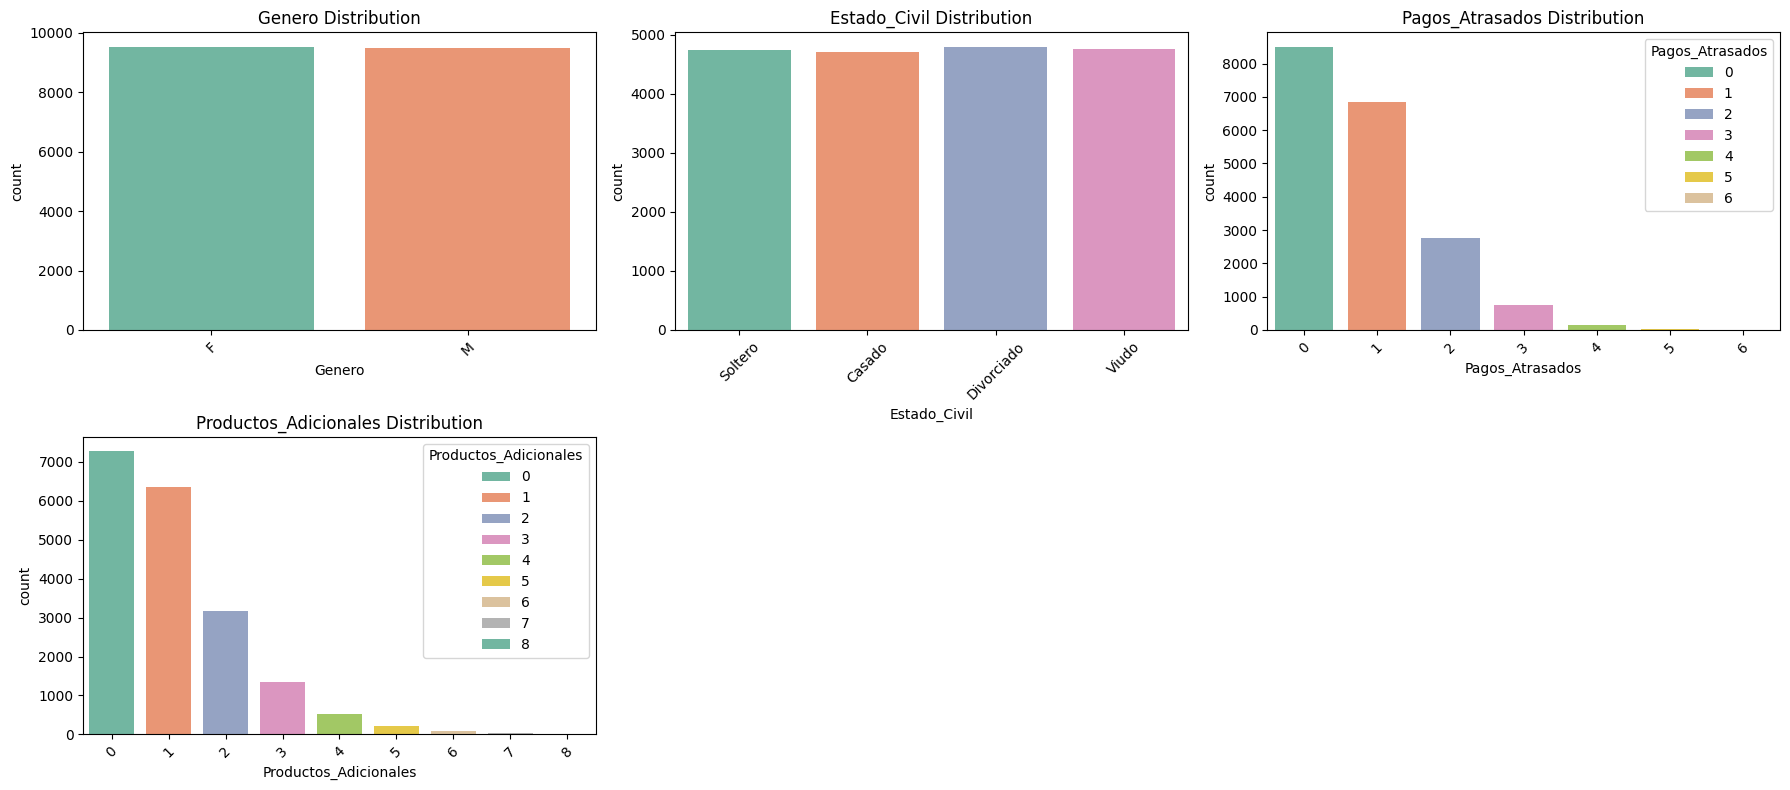

In [13]:
plot_categorical_distributions(data, categorical_cols)

Género: No hay sesgo por género; ambos grupos están representados de forma casi igual.

Estado_civil: No hay una categoría dominante; el estado civil no parece concentrarse en un solo grupo.

Pagos_Atrasados: Indica un buen comportamiento de pago en general; los atrasos múltiples son poco frecuentes.

Productos_Adicionales: Sugiere baja adopción de productos adicionales; posible área de oportunidad comercial.


## Distribución de variable objetivo

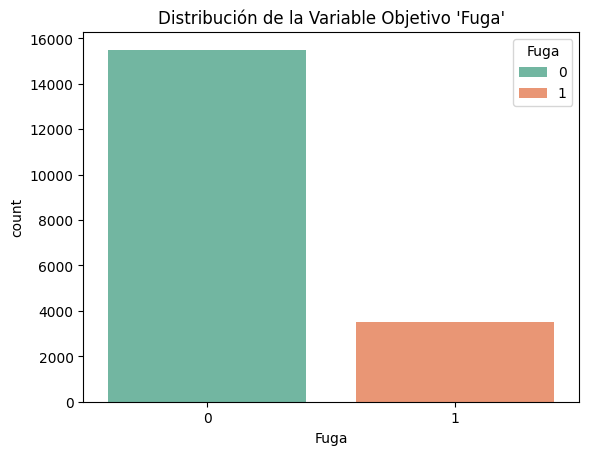

In [14]:
sns.countplot(data=data, x='Fuga', hue='Fuga', palette="Set2")
plt.title("Distribución de la Variable Objetivo 'Fuga'")
plt.show()

In [15]:
data['Fuga'].value_counts()/len(data) * 100

Fuga
0    81.509335
1    18.490665
Name: count, dtype: float64


Fuga (variable objetivo): El dataset está desbalanceado, lo cual puede requerir técnicas de balanceo para modelos predictivos.


# Análisis Multivariado

## Multivariado Cuantitativa vs Cuantiativa

In [16]:
numeric_cols = numeric_cols.drop(['Pagos_Atrasados', 'Productos_Adicionales'])

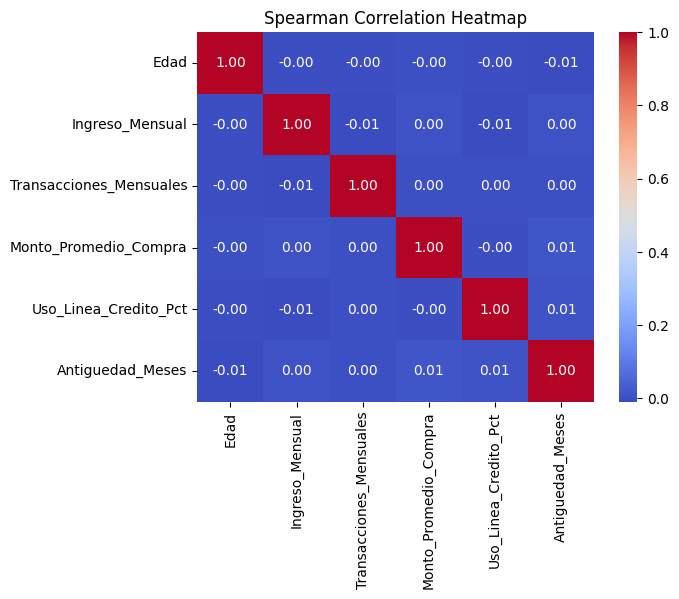

In [17]:
sns.heatmap(data[numeric_cols].corr('spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()

No existen correlaciones significativas entre las variables numéricas; todos los coeficientes están muy cercanos a 0.

Esto indica que las variables son independientes entre sí, sin relaciones lineales ni monótonas fuertes.

Osea, no hay multicolinealidad en el dataset, lo cual es positivo para hacer un modelado predictivo.

Cada variable podría aportar información distinta en el análisis de la fuga, sin redundancia entre ellas.

In [18]:
from scipy.stats import spearmanr
import numpy as np

def get_spearman_pvalues(df):
    """Calcula matriz de p-valores para correlaciones de Spearman
        args: df (DataFrame): DataFrame con variables numéricas
        return: DataFrame con matriz de p-valores
    """
    cols = df.columns
    n = len(cols)
    p_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            if i == j:
                p_matrix[i, j] = 0  # Diagonal siempre 0
            else:
                # Eliminar NaN para el cálculo
                x = df.iloc[:, i].dropna()
                y = df.iloc[:, j].dropna()
                # Encontrar índices comunes (sin NaN en ambas variables)
                common_idx = df[[cols[i], cols[j]]].dropna().index
                if len(common_idx) > 2:
                    corr, p_val = spearmanr(df.loc[common_idx, cols[i]],
                                          df.loc[common_idx, cols[j]])
                    p_matrix[i, j] = p_val
                else:
                    p_matrix[i, j] = np.nan

    return pd.DataFrame(p_matrix, index=cols, columns=cols)

# Calcular matriz de p-valores
p_values_spearman = get_spearman_pvalues(data[numeric_cols])


def correlation_df(df, pval_matrix, method='spearman'):
    # Crear lista de pares únicos (sin repetir)
    corr_matrix = df.corr(method=method)
    pairs_data = []
    cols = df.columns
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            var1, var2 = cols[i], cols[j]
            corr = corr_matrix.loc[var1, var2]
            p_val = pval_matrix.loc[var1, var2]

            # Clasificar fuerza de correlación
            abs_corr = abs(corr)
            if abs_corr < 0.1:
                fuerza = "Muy débil"
            elif abs_corr < 0.3:
                fuerza = "Débil"
            elif abs_corr < 0.5:
                fuerza = "Moderada"
            elif abs_corr < 0.7:
                fuerza = "Fuerte"
            else:
                fuerza = "Muy fuerte"

            pairs_data.append({
                'Par_Variables': f"{var1} ↔ {var2}",
                'Spearman_ρ': corr,
                'p-valor': p_val,
                'Significativo_α05': 'Sí' if p_val < 0.05 else 'No',
                'Fuerza': fuerza
            })

    # Crear DataFrame y ordenar por p-valor
    correlations_df = pd.DataFrame(pairs_data)
    correlations_df = correlations_df.sort_values('p-valor')

    # Redondear valores para mejor legibilidad
    correlations_df['Spearman_ρ'] = correlations_df['Spearman_ρ'].round(4)
    correlations_df['p-valor'] = correlations_df['p-valor'].round(6)

    display(correlations_df)


In [19]:
correlation_df(data[numeric_cols], p_values_spearman, method='spearman')

,Par_Variables,Spearman_ρ,p-valor,Significativo_α05,Fuerza
13,Monto_Promedio_Compra ↔ Antiguedad_Meses,0.0134,0.064139,No,Muy débil
7,Ingreso_Mensual ↔ Uso_Linea_Credito_Pct,-0.0089,0.221392,No,Muy débil
4,Edad ↔ Antiguedad_Meses,-0.0084,0.246440,No,Muy débil
14,Uso_Linea_Credito_Pct ↔ Antiguedad_Meses,0.0070,0.337607,No,Muy débil
5,Ingreso_Mensual ↔ Transacciones_Mensuales,-0.0055,0.444916,No,Muy débil
6,Ingreso_Mensual ↔ Monto_Promedio_Compra,0.0043,0.554932,No,Muy débil
8,Ingreso_Mensual ↔ Antiguedad_Meses,0.0038,0.597284,No,Muy débil
1,Edad ↔ Transacciones_Mensuales,-0.0038,0.597292,No,Muy débil
9,Transacciones_Mensuales ↔ Monto_Promedio_Compra,0.0029,0.687311,No,Muy débil
11,Transacciones_Mensuales ↔ Antiguedad_Meses,0.0026,0.717121,No,Muy débil


No existe multicolinealidad entre variables numéricas, las variables aportan información distinta.

Antigüedad parece ser el principal factor relacionado con el uso de productos adicionales, un posible indicador de fidelidad del cliente.

Las demás correlaciones son insignificantes o muy débiles, por lo que no se espera redundancia en el modelado.

## Multivariado Cualitativa vs Cualitativa

In [20]:
from scipy.stats import chi2_contingency
import numpy as np

def realizar_pruebas_chi2_churn(data, variables_categoricas, target='Fuga', alpha=0.05):
    """
    Realiza pruebas chi-cuadrado para variables categóricas vs Churn.
    Calcula V de Cramer como medida del tamaño del efecto.
    """
    resultados = []

    print("ANÁLISIS CHI-CUADRADO: VARIABLES CATEGÓRICAS vs CHURN")
    print("=" * 65)

    for variable in variables_categoricas:
        if variable == target:  # Skip the target variable itself
            continue

        # Crear tabla de contingencia
        tabla_contingencia = pd.crosstab(data[variable], data[target])

        # Realizar prueba chi-cuadrado
        chi2_stat, p_value, dof, expected = chi2_contingency(tabla_contingencia)

        # Calcular V de Cramer (medida del tamaño del efecto)
        n = tabla_contingencia.sum().sum()
        v_cramer = np.sqrt(chi2_stat / (n * (min(tabla_contingencia.shape) - 1)))

        # Interpretar V de Cramer
        if v_cramer < 0.1:
            efecto = "Muy débil"
        elif v_cramer < 0.3:
            efecto = "Débil"
        elif v_cramer < 0.5:
            efecto = "Moderado"
        else:
            efecto = "Fuerte"

        # Determinar si es significativo
        es_significativo = p_value < alpha

        # Guardar resultados
        resultado = {
            'Variable': variable,
            'Chi2_Estadistico': chi2_stat,
            'p_valor': p_value,
            'Grados_Libertad': dof,
            'V_Cramer': v_cramer,
            'Tamaño_Efecto': efecto,
            'Es_Significativo': 'Sí' if es_significativo else 'No',
            'Interpretacion': 'Rechazar H0 (hay asociación)' if es_significativo else 'No rechazar H0 (no hay asociación)'
        }
        resultados.append(resultado)

        # Mostrar resultados detallados para variables significativas con efecto moderado o fuerte
        if es_significativo : # and v_cramer >= 0.2
            print(f"\n Variable: {variable}")
            print(f"   Chi² = {chi2_stat:.4f}")
            print(f"   p-valor = {p_value:.6f}")
            print(f"   V de Cramer = {v_cramer:.4f} ({efecto})")
            print(f"   Resultado: {resultado['Interpretacion']}")
            print(f"   Tabla de Contingencia:")
            # Mostrar tabla con porcentajes
            tabla_pct = pd.crosstab(data[variable], data[target], normalize='index') * 100
            print(tabla_pct.round(1))
            print("-" * 50)

    # Crear DataFrame con todos los resultados
    df_resultados = pd.DataFrame(resultados)
    df_resultados = df_resultados.sort_values('V_Cramer', ascending=False)

    return df_resultados

# Realizar las pruebas chi-cuadrado
resultados_chi2 = realizar_pruebas_chi2_churn(data, categorical_cols)

print("\n RESUMEN DE TODAS LAS VARIABLES:")
print("=" * 65)
display(resultados_chi2[['Variable', 'Chi2_Estadistico', 'p_valor', 'V_Cramer',
                        'Tamaño_Efecto', 'Es_Significativo']].round(4))

ANÁLISIS CHI-CUADRADO: VARIABLES CATEGÓRICAS vs CHURN

 Variable: Pagos_Atrasados
   Chi² = 43.2314
   p-valor = 0.000000
   V de Cramer = 0.0477 (Muy débil)
   Resultado: Rechazar H0 (hay asociación)
   Tabla de Contingencia:
Fuga                0     1
Pagos_Atrasados            
0                81.3  18.7
1                82.3  17.7
2                82.3  17.7
3                78.0  22.0
4                63.1  36.9
5                82.6  17.4
6                50.0  50.0
--------------------------------------------------

 Variable: Productos_Adicionales
   Chi² = 37.0905
   p-valor = 0.000011
   V de Cramer = 0.0442 (Muy débil)
   Resultado: Rechazar H0 (hay asociación)
   Tabla de Contingencia:
Fuga                      0     1
Productos_Adicionales            
0                      79.6  20.4
1                      81.9  18.1
2                      83.4  16.6
3                      83.1  16.9
4                      84.5  15.5
5                      86.2  13.8
6                  

,Variable,Chi2_Estadistico,p_valor,V_Cramer,Tamaño_Efecto,Es_Significativo
2,Pagos_Atrasados,43.2314,0.0000,0.0477,Muy débil,Sí
3,Productos_Adicionales,37.0905,0.0000,0.0442,Muy débil,Sí
1,Estado_Civil,4.1657,0.2441,0.0148,Muy débil,No
0,Genero,0.0259,0.8722,0.0012,Muy débil,No


Existen asociaciones débiles pero significativas entre fuga y el comportamiento de pagos/productos contratados.

Las variables demográficas no influyen de manera notable en la probabilidad de fuga.

En conjunto, las variables categóricas tienen un bajo/nulo poder explicativo individual, aunque pueden aportar valor combinadas en modelos multivariados.

## Multivariado Cuantitativa vs Cualitativa

In [21]:
def plot_numeric_distributions_by_target(data, target, numeric_cols):
    cols_per_row = 2
    n = len(numeric_cols)
    rows = -(-n // cols_per_row)

    plt.figure(figsize=(cols_per_row * 7, rows * 4))

    for idx, col in enumerate(numeric_cols, 1):
        plt.subplot(rows, cols_per_row*2, idx)
        sns.boxplot(y=data[col], x=data[target], hue=data[target], palette="Set3", showmeans=True)
        plt.title(f"{col} by {target} - Boxplot")

    plt.tight_layout()
    plt.show()

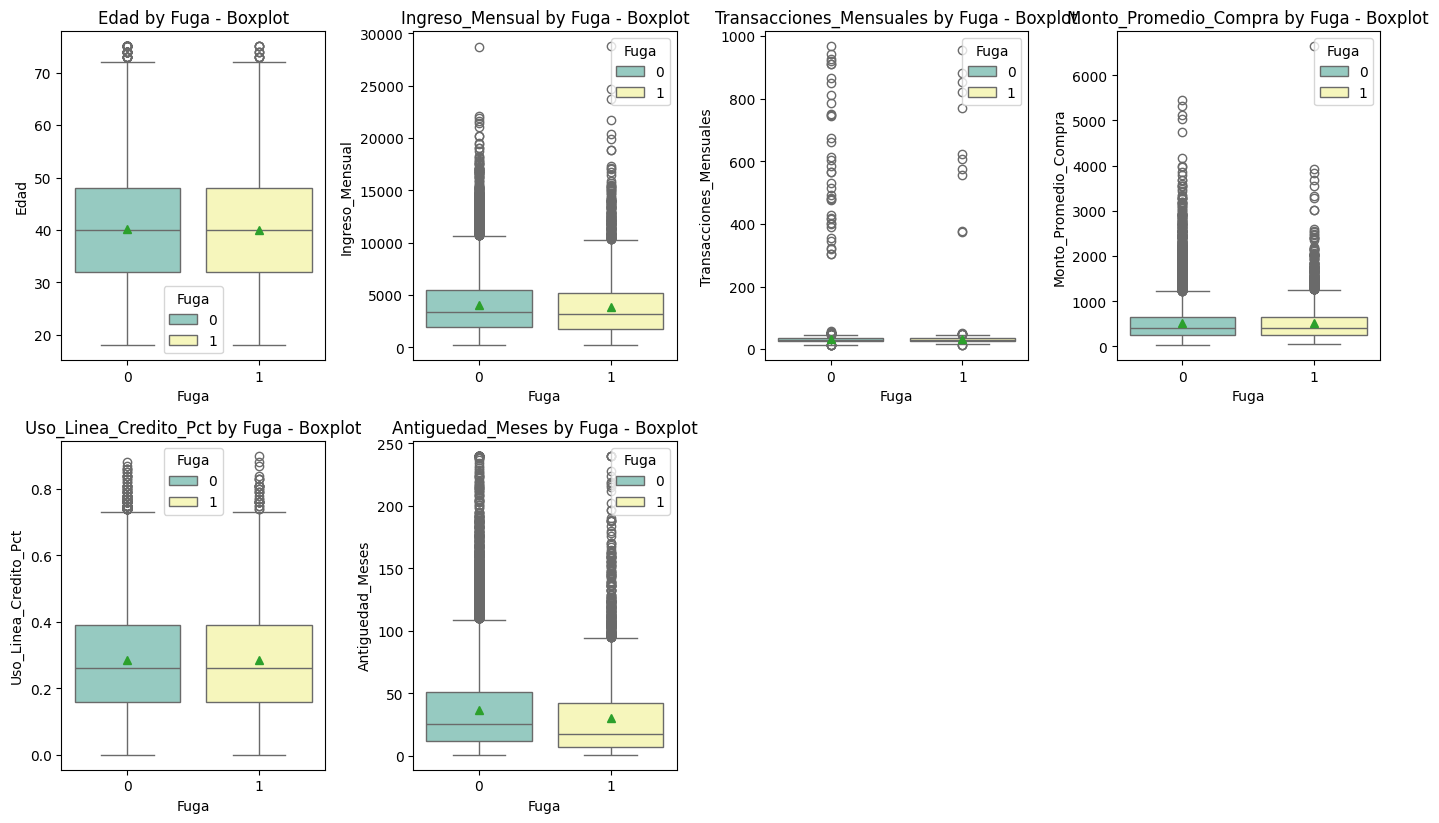

In [22]:
plot_numeric_distributions_by_target(data, 'Fuga', numeric_cols)

Las diferencias entre los grupos son en su mayoría leves, pero destacan menor antigüedad e ingreso en los clientes fugados.

No se aprecian variables numéricas con separación visual fuerte, aunque Antigüedad y Monto Promedio de Compra muestran tendencias útiles para análisis predictivo.

En conjunto, las variables cuantitativas aportan información parcial; su poder explicativo puede mejorar combinándolas con variables categóricas.

In [23]:
from scipy.stats import mannwhitneyu
import numpy as np

def mann_whitney_analysis(data, numeric_cols, target_col, alpha=0.05):
    """
    Performs Mann-Whitney U test for numeric variables vs binary target.
    Calculates effect size using r of Rosenthal.

    Parameters:
    -----------
    data : DataFrame
        The dataset containing numeric and target variables
    numeric_cols : list
        List of numeric column names to test
    target_col : str
        Name of the binary target variable
    alpha : float
        Significance level (default 0.05)

    Returns:
    --------
    DataFrame with test results and effect sizes
    """
    results = []

    # Get unique values of target variable
    target_values = data[target_col].unique()
    if len(target_values) != 2:
        raise ValueError(f"Target variable must be binary. Found {len(target_values)} unique values.")

    group1_label, group2_label = target_values[0], target_values[1]

    for variable in numeric_cols:
        # Separate groups by target variable
        group1 = data[data[target_col] == group1_label][variable].dropna()
        group2 = data[data[target_col] == group2_label][variable].dropna()

        # Check if both groups have data
        if len(group1) == 0 or len(group2) == 0:
            print(f"⚠️  Variable {variable}: No hay datos suficientes")
            continue

        # Perform Mann-Whitney U test
        statistic, p_value = mannwhitneyu(group1, group2, alternative='two-sided')

        # Calculate effect size (r of Rosenthal)
        n1, n2 = len(group1), len(group2)
        n_total = n1 + n2

        # Calculate z-score approximation for effect size
        # For large samples, U approaches normal distribution
        mean_u = n1 * n2 / 2
        std_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
        z_score = abs(statistic - mean_u) / std_u

        # r of Rosenthal = z / sqrt(n)
        r_rosenthal = z_score / np.sqrt(n_total)

        # Interpret effect size
        if r_rosenthal < 0.1:
            effect_size = "Muy pequeño"
        elif r_rosenthal < 0.3:
            effect_size = "Pequeño"
        elif r_rosenthal < 0.5:
            effect_size = "Mediano"
        else:
            effect_size = "Grande"

        # Determine significance
        is_significant = p_value < alpha

        # Calculate descriptive statistics
        median_group1 = group1.median()
        median_group2 = group2.median()
        mean_group1 = group1.mean()
        mean_group2 = group2.mean()

        # Store results
        result = {
            'Variable': variable,
            'U_Statistic': statistic,
            'p_value': p_value,
            'r_Rosenthal': r_rosenthal,
            'Effect_Size': effect_size,
            'Significant': 'Sí' if is_significant else 'No',
            f'Median_{group1_label}': median_group1,
            f'Median_{group2_label}': median_group2,
            f'Mean_{group1_label}': mean_group1,
            f'Mean_{group2_label}': mean_group2,
            f'n_{group1_label}': n1,
            f'n_{group2_label}': n2
        }
        results.append(result)

        # Print detailed results
        print(f"Variable: {variable}")
        print(f"   Mann-Whitney U = {statistic:.2f}")
        print(f"   p-valor = {p_value:.6f}")
        print(f"   r de Rosenthal = {r_rosenthal:.4f} ({effect_size})")
        print(f"   Significativo: {'Sí' if is_significant else 'No'}")
        print(f"   Medianas: {group1_label} = {median_group1:.2f}, {group2_label} = {median_group2:.2f}")
        print(f"   Medias: {group1_label} = {mean_group1:.2f}, {group2_label} = {mean_group2:.2f}")
        print(f"   Tamaños de muestra: {group1_label} = {n1}, {group2_label} = {n2}")

        # Interpretation
        if is_significant:
            if median_group2 > median_group1:
                direction = f"{group2_label} tiende a tener valores MÁS ALTOS"
            else:
                direction = f"{group1_label} tiende a tener valores MÁS ALTOS"
            print(f"Interpretación: {direction}")
        else:
            print(f"Interpretación: No hay diferencia significativa entre grupos")

        print("-" * 60)

    # Create results DataFrame
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('r_Rosenthal', ascending=False)

    return results_df

In [1]:
# Execute Mann-Whitney analysis for numeric variables vs Churn
numeric_columns = numeric_cols.tolist()
mann_whitney_results = mann_whitney_analysis(data, numeric_columns, 'Fuga')

print("\nRESUMEN DE RESULTADOS:")
print("=" * 60)
display(mann_whitney_results[['Variable', 'U_Statistic', 'p_value', 'r_Rosenthal',
                             'Effect_Size', 'Significant']].round(4))

NameError: name 'numeric_cols' is not defined

Las variables Antigüedad_Meses y Ingreso_Mensual muestran diferencias estadísticamente significativas entre clientes que se fugan y los que permanecen (p < 0.05).

Aunque las diferencias son muy pequeñas en magnitud (r < 0.1), sugieren que los clientes más nuevos y de menor ingreso son más propensos a fugarse.

Las demás variables (Edad, Monto_Promedio_Compra, Uso_Linea_Credito_Pct, Transacciones_Mensuales) no presentan diferencias significativas entre ambos grupos, lo que indica que no influyen directamente en la fuga.

## Entrenamiento Data Cruda 

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Use the existing DataFrame ---
df = data.copy() # Use the existing 'data' DataFrame

df = df.drop('ID_Cliente', axis=1)

# --- Codificar variables categóricas ---
df_encoded = pd.get_dummies(df, drop_first=True)

# --- Separar variables independientes (X) y dependiente (y) ---
X = df_encoded.drop('Fuga', axis=1)
y = df_encoded['Fuga']

# --- Dividir en entrenamiento y prueba ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Crear y entrenar modelo ---
model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# --- Predicción y evaluación ---
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.4817249539836971
              precision    recall  f1-score   support

           0       0.84      0.45      0.58      3100
           1       0.21      0.64      0.31       703

    accuracy                           0.48      3803
   macro avg       0.53      0.54      0.45      3803
weighted avg       0.73      0.48      0.53      3803

[[1384 1716]
 [ 255  448]]


/Users/kanyewest/Documents/DataMiningTools/data-mining-tools-activities/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
from sklearn.metrics import average_precision_score, auc, precision_recall_curve

# Get probability predictions for the positive class
y_proba_raw = model.predict_proba(X_test)[:, 1]

# Calculate Average Precision
avg_precision_raw = average_precision_score(y_test, y_proba_raw)

# Calculate PR AUC
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba_raw)
pr_auc_raw = auc(recall_vals, precision_vals)

print(f"Average Precision (Raw Logit): {avg_precision_raw:.4f}")
print(f"PR AUC (Raw Logit): {pr_auc_raw:.4f}")

Average Precision (Raw Logit): 0.2167
PR AUC (Raw Logit): 0.2156


Raw Logistic Regression Results:
Average Precision: 0.2167
PR-AUC: 0.2156

Confusion Matrix:
[[1384 1716]
 [ 255  448]]


<Figure size 800x600 with 0 Axes>

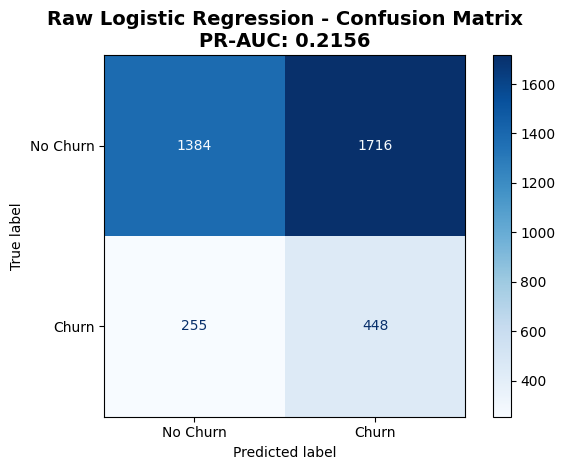


Detailed Metrics:
Precision: 0.2070
Recall: 0.6373
F1-Score: 0.3125

Classification Report:
              precision    recall  f1-score   support

           0     0.8444    0.4465    0.5841      3100
           1     0.2070    0.6373    0.3125       703

    accuracy                         0.4817      3803
   macro avg     0.5257    0.5419    0.4483      3803
weighted avg     0.7266    0.4817    0.5339      3803



In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

import matplotlib.pyplot as plt

# Calculate PR-AUC for raw logit (already calculated)
print("Raw Logistic Regression Results:")
print(f"Average Precision: {avg_precision_raw:.4f}")
print(f"PR-AUC: {pr_auc_raw:.4f}")

# Create confusion matrix for raw logit
cm_raw = confusion_matrix(y_test, y_pred)
print(f"\nConfusion Matrix:")
print(cm_raw)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_raw, display_labels=['No Churn', 'Churn'])
disp.plot(cmap='Blues', values_format='d')
plt.title(f'Raw Logistic Regression - Confusion Matrix\nPR-AUC: {pr_auc_raw:.4f}', 
          fontsize=14, fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()

# Calculate additional metrics

precision_raw = precision_score(y_test, y_pred)
recall_raw = recall_score(y_test, y_pred) 
f1_raw = f1_score(y_test, y_pred)

print(f"\nDetailed Metrics:")
print(f"Precision: {precision_raw:.4f}")
print(f"Recall: {recall_raw:.4f}")
print(f"F1-Score: {f1_raw:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

## Feature importance data cruda

Dataset data cruda shape: (19015, 12)
Train set para importance: (15212, 12)
Test set para importance: (3803, 12)
Features: ['Edad', 'Ingreso_Mensual', 'Transacciones_Mensuales', 'Monto_Promedio_Compra', 'Uso_Linea_Credito_Pct', 'Pagos_Atrasados', 'Antiguedad_Meses', 'Productos_Adicionales', 'Genero_M', 'Estado_Civil_Divorciado', 'Estado_Civil_Soltero', 'Estado_Civil_Viudo']

=== TOP 15 FEATURES MÁS IMPORTANTES (DATA CRUDA - TRAINING ONLY) ===
                Feature  Importance
        Ingreso_Mensual    0.169845
  Monto_Promedio_Compra    0.167614
  Uso_Linea_Credito_Pct    0.137363
       Antiguedad_Meses    0.131565
                   Edad    0.126548
Transacciones_Mensuales    0.115519
        Pagos_Atrasados    0.041648
  Productos_Adicionales    0.039132
               Genero_M    0.021758
Estado_Civil_Divorciado    0.016692
     Estado_Civil_Viudo    0.016387
   Estado_Civil_Soltero    0.015927

=== VALIDACIÓN DEL MODELO ===
Accuracy en Training: 1.0000
Accuracy en Test: 0.8141

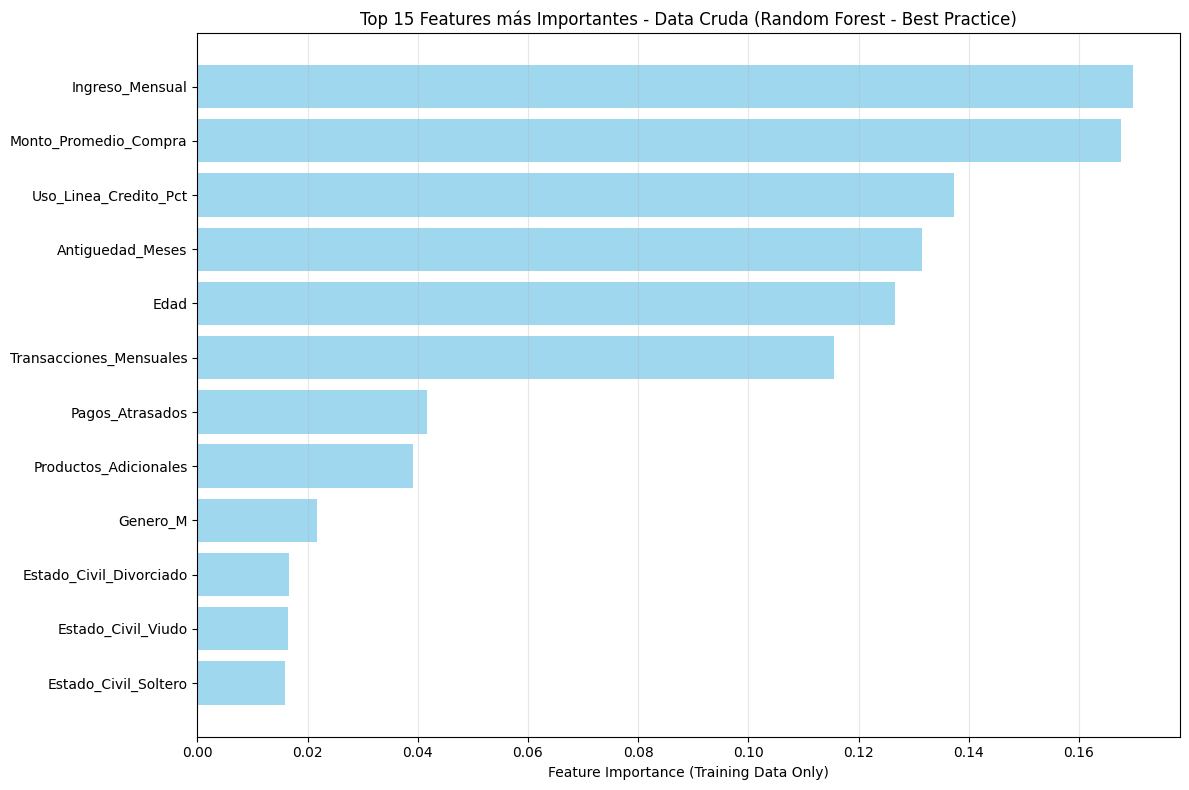


=== ESTADÍSTICAS DE FEATURE IMPORTANCE ===
Total de features: 12
Importancia acumulada top 5: 0.7329
Importancia acumulada top 10: 0.9677
Importancia acumulada top 15: 1.0000

Distribución de importancia:
- Features con importancia > 0.1: 6
- Features con importancia > 0.05: 6
- Features con importancia > 0.01: 12


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data_raw_importance = data.copy()

data_raw_importance = data_raw_importance.drop('ID_Cliente', axis=1)

data_raw_importance = pd.get_dummies(data_raw_importance, drop_first=True)

# Separar features y target
y_raw_importance = data_raw_importance['Fuga']
X_raw_importance = data_raw_importance.drop('Fuga', axis=1)

# Manejar valores faltantes
X_raw_importance = X_raw_importance.fillna(X_raw_importance.median())


X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(
    X_raw_importance, y_raw_importance, test_size=0.2, random_state=42, stratify=y_raw_importance
)

print(f"Dataset data cruda shape: {X_raw_importance.shape}")
print(f"Train set para importance: {X_train_imp.shape}")
print(f"Test set para importance: {X_test_imp.shape}")
print(f"Features: {list(X_raw_importance.columns)}")


rf_raw = RandomForestClassifier(n_estimators=100, random_state=42)
rf_raw.fit(X_train_imp, y_train_imp)  

importance_df_raw = pd.DataFrame({
    'Feature': X_train_imp.columns,
    'Importance': rf_raw.feature_importances_  
}).sort_values('Importance', ascending=False)

print("\n=== TOP 15 FEATURES MÁS IMPORTANTES (DATA CRUDA - TRAINING ONLY) ===")
print(importance_df_raw.head(15).to_string(index=False))

# Evaluar performance en test set para validar
train_score = rf_raw.score(X_train_imp, y_train_imp)
test_score = rf_raw.score(X_test_imp, y_test_imp)
print(f"\n=== VALIDACIÓN DEL MODELO ===")
print(f"Accuracy en Training: {train_score:.4f}")
print(f"Accuracy en Test: {test_score:.4f}")
print(f"Diferencia (Overfitting check): {train_score - test_score:.4f}")

# Graficar feature importance
plt.figure(figsize=(12, 8))
top_features_raw = importance_df_raw.head(15)
plt.barh(range(len(top_features_raw)), top_features_raw['Importance'], color='skyblue', alpha=0.8)
plt.yticks(range(len(top_features_raw)), top_features_raw['Feature'])
plt.xlabel('Feature Importance (Training Data Only)')
plt.title('Top 15 Features más Importantes - Data Cruda (Random Forest - Best Practice)')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Estadísticas adicionales
print(f"\n=== ESTADÍSTICAS DE FEATURE IMPORTANCE ===")
print(f"Total de features: {len(importance_df_raw)}")
print(f"Importancia acumulada top 5: {importance_df_raw.head(5)['Importance'].sum():.4f}")
print(f"Importancia acumulada top 10: {importance_df_raw.head(10)['Importance'].sum():.4f}")
print(f"Importancia acumulada top 15: {importance_df_raw.head(15)['Importance'].sum():.4f}")

print(f"\nDistribución de importancia:")
print(f"- Features con importancia > 0.1: {len(importance_df_raw[importance_df_raw['Importance'] > 0.1])}")
print(f"- Features con importancia > 0.05: {len(importance_df_raw[importance_df_raw['Importance'] > 0.05])}")
print(f"- Features con importancia > 0.01: {len(importance_df_raw[importance_df_raw['Importance'] > 0.01])}")

# Guardar para comparación posterior
importance_df_raw_global = importance_df_raw.copy()

# Feature Engineering + Scaling

In [29]:
pipe_df = data.copy()

In [30]:
pipe_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19015 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_Cliente               19015 non-null  int64  
 1   Edad                     19015 non-null  float64
 2   Genero                   19015 non-null  object 
 3   Estado_Civil             19015 non-null  object 
 4   Ingreso_Mensual          19015 non-null  float64
 5   Transacciones_Mensuales  19015 non-null  int64  
 6   Monto_Promedio_Compra    19015 non-null  float64
 7   Uso_Linea_Credito_Pct    19015 non-null  float64
 8   Pagos_Atrasados          19015 non-null  int64  
 9   Antiguedad_Meses         19015 non-null  int64  
 10  Productos_Adicionales    19015 non-null  int64  
 11  Fuga                     19015 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 2.4+ MB


In [34]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
from dataclasses import dataclass

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, average_precision_score
from sklearn.impute import SimpleImputer

def robust_z(x, med, iqr, eps=1e-9):
    return (x - med) / (iqr + eps)

def clip01(x, eps=1e-3):
    return np.clip(x, eps, 1 - eps)

class FeatureBuilder(BaseEstimator, TransformerMixin):
    """
    Versión clone-safe: el __init__ NO muta los parámetros.
    """
    def __init__(self,
                 num_cols=('Edad','Ingreso_Mensual','Transacciones_Mensuales','Monto_Promedio_Compra',
                           'Uso_Linea_Credito_Pct','Pagos_Atrasados','Antiguedad_Meses','Productos_Adicionales'),
                 cat_cols=('Genero','Estado_Civil'),
                 target_col='Fuga'):
        # ⬇️ Guardar EXACTAMENTE lo que llega (tuplas), sin list(), sin copiar.
        self.num_cols = num_cols
        self.cat_cols = cat_cols
        self.target_col = target_col

    def fit(self, X, y=None):
        df = X.copy()
    
        # imputaciones (no modifican los atributos del estimador)
        self.medians_ = {c: np.nanmedian(df[c]) for c in self.num_cols if c in df.columns}
        for c in self.num_cols:
            if c in df:
                df[c] = df[c].fillna(self.medians_[c])

        self.cat_fill_ = {c: (df[c].mode(dropna=True).iloc[0] if c in df and df[c].notna().any() else 'Desconocido')
                          for c in self.cat_cols if c in df.columns}
        for c in self.cat_cols:
            if c in df:
                df[c] = df[c].fillna(self.cat_fill_.get(c, 'Desconocido')).astype(str)

        tmp = self._build_features(df, is_fit=True)

        # umbrales/estadísticos para flags e índices
        self.ing_q1_ = np.nanquantile(df['Ingreso_Mensual'], 0.25) if 'Ingreso_Mensual' in df else 0.0
        self.tx_q1_  = np.nanquantile(df['Transacciones_Mensuales'], 0.25) if 'Transacciones_Mensuales' in df else 0.0
        self.sp_q3_  = np.nanquantile(tmp['spend_income'], 0.75) if 'spend_income' in tmp else 1.0

        def med_iqr(s):
            med = np.nanmedian(s); q1 = np.nanquantile(s,0.25); q3 = np.nanquantile(s,0.75); iqr = q3-q1
            return med, iqr if iqr>0 else 1.0

        self.rstats_ = {}
        for col in ['logit_Util','overdue_rate','log_Tenure','Productos_Adicionales',
                    'log_Tx','log_Monto','Productos_Adicionales','log_Ingreso']:
            if col in tmp:
                self.rstats_[col] = med_iqr(tmp[col])

        return self

    def _build_features(self, df, is_fit=False):
        out = df.copy()

        # Transformaciones
        if 'Ingreso_Mensual' in out:   out['log_Ingreso'] = np.log1p(out['Ingreso_Mensual'].clip(lower=0))
        if 'Transacciones_Mensuales' in out: out['log_Tx'] = np.log1p(out['Transacciones_Mensuales'].clip(lower=0))
        if 'Monto_Promedio_Compra' in out:  out['log_Monto'] = np.log1p(out['Monto_Promedio_Compra'].clip(lower=0))
        if 'Antiguedad_Meses' in out:  out['log_Tenure'] = np.log1p(out['Antiguedad_Meses'].clip(lower=0))
        if 'Uso_Linea_Credito_Pct' in out:
            out['logit_Util'] = np.log(clip01(out['Uso_Linea_Credito_Pct'])/ (1-clip01(out['Uso_Linea_Credito_Pct'])))

        # Discretas
        if 'Pagos_Atrasados' in out:
            out['has_overdue']  = (out['Pagos_Atrasados']>0).astype(int)
            out['overdue_ge2']  = (out['Pagos_Atrasados']>=2).astype(int)
        if {'Pagos_Atrasados','Antiguedad_Meses'}.issubset(out.columns):
            out['overdue_rate'] = out['Pagos_Atrasados'] / (1 + out['Antiguedad_Meses']/12.0)

        if 'Productos_Adicionales' in out:
            out['has_products'] = (out['Productos_Adicionales']>0).astype(int)
            out['multi_product'] = (out['Productos_Adicionales']>=3).astype(int)

        # Ratios
        if {'Transacciones_Mensuales','Monto_Promedio_Compra'}.issubset(out.columns):
            out['gasto_mensual'] = out['Transacciones_Mensuales'] * out['Monto_Promedio_Compra']
        if {'gasto_mensual','Ingreso_Mensual'}.issubset(out.columns):
            out['spend_income']  = out['gasto_mensual'] / (out['Ingreso_Mensual'] + 1e-6)
            out['ticket_income'] = out['Monto_Promedio_Compra'] / (out['Ingreso_Mensual'] + 1e-6)
            out['ingreso_residual'] = out['Ingreso_Mensual'] - out['gasto_mensual']
            out['residual_negativo'] = (out['ingreso_residual']<0).astype(int)
        if {'Uso_Linea_Credito_Pct','Productos_Adicionales'}.issubset(out.columns):
            out['util_per_prod'] = out['Uso_Linea_Credito_Pct'] / (1 + out['Productos_Adicionales'])
        if {'Transacciones_Mensuales','Productos_Adicionales'}.issubset(out.columns):
            out['tx_per_prod'] = out['Transacciones_Mensuales'] / (1 + out['Productos_Adicionales'])
        if {'Transacciones_Mensuales','Antiguedad_Meses'}.issubset(out.columns):
            out['tx_per_tenure'] = (out['Transacciones_Mensuales']*12.0) / (1 + out['Antiguedad_Meses'])
        if {'Pagos_Atrasados','Productos_Adicionales'}.issubset(out.columns):
            out['overdue_per_prod'] = out['Pagos_Atrasados'] / (1 + out['Productos_Adicionales'])

        # Bins
        if 'Antiguedad_Meses' in out:
            bins = np.array([0,3,6,12,24,np.inf])
            labels = ['0-3','3-6','6-12','12-24','24+']
            out['tenure_bin'] = pd.cut(out['Antiguedad_Meses'], bins=bins, labels=labels, right=True, include_lowest=True).astype(str)

        if not is_fit and hasattr(self, 'ing_q1_') and 'Ingreso_Mensual' in out:
            q2 = np.nanquantile(out['Ingreso_Mensual'],0.50)
            q3 = np.nanquantile(out['Ingreso_Mensual'],0.75)
            edges = [-np.inf, self.ing_q1_, q2, q3, np.inf]
            out['ing_bin'] = pd.cut(out['Ingreso_Mensual'], bins=edges, labels=['Q1','Q2','Q3','Q4']).astype(str)
            out['ing_q1_flag'] = (out['Ingreso_Mensual']<=self.ing_q1_).astype(int)
        elif is_fit and 'Ingreso_Mensual' in out:
            q1 = np.nanquantile(out['Ingreso_Mensual'],0.25)
            q2 = np.nanquantile(out['Ingreso_Mensual'],0.50)
            q3 = np.nanquantile(out['Ingreso_Mensual'],0.75)
            edges = [-np.inf, q1, q2, q3, np.inf]
            out['ing_bin'] = pd.cut(out['Ingreso_Mensual'], bins=edges, labels=['Q1','Q2','Q3','Q4']).astype(str)
            out['ing_q1_flag'] = (out['Ingreso_Mensual']<=q1).astype(int)

        if 'Uso_Linea_Credito_Pct' in out:
            u = out['Uso_Linea_Credito_Pct']
            out['util_band'] = pd.cut(u, bins=[-np.inf,0.3,0.6,0.8,np.inf], labels=['<=0.3','0.3-0.6','0.6-0.8','>0.8']).astype(str)

        # Flags
        if not is_fit and hasattr(self, 'sp_q3_'):
            if 'spend_income' in out and 'Ingreso_Mensual' in out:
                out['flag_high_strain'] = ((out['spend_income']>=self.sp_q3_) & (out['Ingreso_Mensual']<=self.ing_q1_)).astype(int)
        if 'Antiguedad_Meses' in out and 'Productos_Adicionales' in out:
            out['flag_new_low_bundle'] = ((out['Antiguedad_Meses']<=6) & (out['Productos_Adicionales']<=1)).astype(int)
        if 'Uso_Linea_Credito_Pct' in out and 'Pagos_Atrasados' in out:
            out['flag_util_overdue'] = ((out['Uso_Linea_Credito_Pct']>=0.8) & (out['Pagos_Atrasados']>=2)).astype(int)
        if 'Antiguedad_Meses' in out and 'Transacciones_Mensuales' in out and not is_fit:
            out['flag_cold_start_low_use'] = ((out['Antiguedad_Meses']<=12) & (out['Transacciones_Mensuales']<=self.tx_q1_)).astype(int)
        if {'Pagos_Atrasados','Productos_Adicionales','Antiguedad_Meses'}.issubset(out.columns):
            out['flag_loyal'] = ((out['Pagos_Atrasados']==0) & (out['Productos_Adicionales']>=4) & (out['Antiguedad_Meses']>=24)).astype(int)

        # Interacciones
        if 'logit_Util' in out and 'overdue_ge2' in out: out['int_util_overdue2'] = out['logit_Util'] * out['overdue_ge2']
        if 'spend_income' in out and 'has_overdue' in out: out['int_spend_overdue'] = out['spend_income'] * out['has_overdue']
        if 'log_Monto' in out and 'overdue_ge2' in out:    out['int_monto_overdue2'] = out['log_Monto'] * out['overdue_ge2']
        if 'log_Tx' in out and 'overdue_ge2' in out:       out['int_tx_overdue2'] = out['log_Tx'] * out['overdue_ge2']
        if 'logit_Util' in out and 'ing_q1_flag' in out:   out['int_util_ingQ1'] = out['logit_Util'] * out['ing_q1_flag']
        if 'Antiguedad_Meses' in out and 'has_products' in out:
            out['int_new_nobundle'] = ((out['Antiguedad_Meses']<=6).astype(int) * (1 - out['has_products'])).astype(int)

        # Índices robustos
        if not is_fit and hasattr(self, 'rstats_'):
            def rz(col):
                med, iqr = self.rstats_[col]
                return robust_z(out[col], med, iqr) if col in out else 0.0
            out['risk_idx'] = rz('logit_Util') + rz('overdue_rate') - rz('log_Tenure') - rz('Productos_Adicionales')
            out['eng_idx']  = rz('log_Tx') + rz('log_Monto') + rz('Productos_Adicionales') + rz('log_Tenure')

        # Asegurar tipos categóricos
        for c in self.cat_cols:
            if c in out: out[c] = out[c].astype(str)
        for c in ['tenure_bin','ing_bin','util_band']:
            if c in out: out[c] = out[c].astype(str)

        return out

    def transform(self, X):
        df = X.copy()
        for c in self.num_cols:
            if c in df:
                df[c] = df[c].fillna(self.medians_.get(c, 0))
        for c in self.cat_cols:
            if c in df:
                df[c] = df[c].fillna(self.cat_fill_.get(c, 'Desconocido')).astype(str)
        return self._build_features(df, is_fit=False)



def make_model_pipeline():
    """
    Devuelve un Pipeline sklearn listo:
      FeatureBuilder -> imputación extra -> preprocesamiento -> LogisticRegression
    """
    feat = FeatureBuilder()

    # Selectores automáticos por dtype
    num_sel = selector(dtype_include=np.number)
    cat_sel = selector(dtype_include=object)

    pre = ColumnTransformer(
        transformers=[
            # numéricas: imputación (por si quedó algo) + robust scaling
            ('num', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', RobustScaler(with_centering=True, with_scaling=True))
            ]), num_sel),
            # categóricas: imputación + one-hot
            ('cat', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
            ]), cat_sel)
        ],
        remainder='drop'
    )

    clf = LogisticRegression(
        solver='saga',
        penalty='l2',
        C=0.01,
        class_weight='balanced',
        max_iter=10000,
        n_jobs=None,
        random_state=42 
    )

    pipe = Pipeline(steps=[
        ('feat', feat),
        ('pre', pre),
        ('clf', clf)
    ])
    return pipe


# ---------- Calibración de umbral con restricción de recall ----------
@dataclass
class ThresholdCVResult:
    threshold: float
    cv_precision: float
    cv_recall: float
    cv_f1: float
    cv_avg_precision: float

def calibrate_threshold_with_cv(pipe, X, y, recall_target=0.70, n_splits=5, random_state=42):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    precisions, recalls, f1s, aps, thrs = [], [], [], [], []

    for tr, va in skf.split(X, y):
        X_tr, X_va = X.iloc[tr], X.iloc[va]
        y_tr, y_va = y.iloc[tr], y.iloc[va]

        pipe.fit(X_tr, y_tr)
        p_va = pipe.predict_proba(X_va)[:, 1]

        prec, rec, thr = precision_recall_curve(y_va, p_va)
        # Alinear: thresholds tiene len = len(prec)-1
        prec_, rec_, thr_ = prec[:-1], rec[:-1], thr

        mask = rec_ >= recall_target
        if mask.any():
            idx = np.argmax(prec_[mask])  # máxima precisión cumpliendo recall
            best_thr = thr_[mask][idx]
        else:
            # si ninguna alcanza el recall, usa mínimo threshold (max recall)
            best_thr = thr_.min() if len(thr_) else 0.5

        y_hat = (p_va >= best_thr).astype(int)
        P = precision_score(y_va, y_hat, zero_division=0)
        R = recall_score(y_va, y_hat, zero_division=0)
        F = f1_score(y_va, y_hat, zero_division=0)
        AP = average_precision_score(y_va, p_va)

        precisions.append(P); recalls.append(R); f1s.append(F); aps.append(AP); thrs.append(best_thr)

    return ThresholdCVResult(
        threshold=float(np.median(thrs)),
        cv_precision=float(np.mean(precisions)),
        cv_recall=float(np.mean(recalls)),
        cv_f1=float(np.mean(f1s)),
        cv_avg_precision=float(np.mean(aps))
    )


# ---------- Ejemplo de uso ----------
# df = ...  # tu DataFrame original
# y = df['Fuga'].astype(int)           # 1 = churn, 0 = no churn
# X = df.drop(columns=['Fuga','ID_Cliente'], errors='ignore')

# pipe = make_model_pipeline()
# Prepare data
y = pipe_df['Fuga'].astype(int)           # 1 = churn, 0 = no churn
X = pipe_df.drop(columns=['Fuga','ID_Cliente'], errors='ignore')

# Split into train and test sets BEFORE CV
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Train churn rate: {y_train.mean():.3f}")
print(f"Test churn rate: {y_test.mean():.3f}\n")

# Create pipeline and calibrate threshold using CV on TRAINING set only
pipe = make_model_pipeline()
result = calibrate_threshold_with_cv(pipe, X_train, y_train, recall_target=0.70, n_splits=5, random_state=42)
thr = result.threshold
print("Threshold CV (on train):", result)

# Train final model on training set
pipe.fit(X_train, y_train)

# Evaluate on TRAINING set
proba_train = pipe.predict_proba(X_train)[:,1]
y_pred_train = (proba_train >= thr).astype(int)
print("\nTrain metrics @thr:", 
      "Precision", precision_score(y_train, y_pred_train), 
      "Recall", recall_score(y_train, y_pred_train), 
      "F1", f1_score(y_train, y_pred_train))

# Evaluate on TEST set (unseen data)
proba_test = pipe.predict_proba(X_test)[:,1]
y_pred_test = (proba_test >= thr).astype(int)
print("Test metrics @thr:", 
      "Precision", precision_score(y_test, y_pred_test), 
      "Recall", recall_score(y_test, y_pred_test), 
      "F1", f1_score(y_test, y_pred_test))

# Store variables for later use
proba = proba_test
y = y_test    

Train set size: 15212
Test set size: 3803
Train churn rate: 0.185
Test churn rate: 0.185

Threshold CV (on train): ThresholdCVResult(threshold=0.45457520068703366, cv_precision=0.2095971721257372, cv_recall=0.7060081035125757, cv_f1=0.32312644680024094, cv_avg_precision=0.23774935459237762)

Train metrics @thr: Precision 0.21488412577521487 Recall 0.7020974049057945 F1 0.32905698100633124
Test metrics @thr: Precision 0.20773576705780095 Recall 0.6799431009957326 F1 0.3182423435419441


In [35]:
from sklearn.metrics import average_precision_score, auc, precision_recall_curve

# Calculate PR-AUC and Average Precision for the Feature Engineering Pipeline
# Using the probabilities from the trained pipeline

# Calculate Average Precision
avg_precision_fe = average_precision_score(y, proba)

# Calculate PR AUC
precision_vals_fe, recall_vals_fe, _ = precision_recall_curve(y, proba)
pr_auc_fe = auc(recall_vals_fe, precision_vals_fe)

print(f"\n=== Feature Engineering Pipeline Metrics ===")
print(f"Average Precision: {avg_precision_fe:.4f}")
print(f"PR AUC: {pr_auc_fe:.4f}")
print(f"\nComparison with Raw Logit:")
print(f"Average Precision - Raw: {avg_precision_raw:.4f} | FE: {avg_precision_fe:.4f} | Improvement: {(avg_precision_fe - avg_precision_raw):.4f}")
print(f"PR AUC - Raw: {pr_auc_raw:.4f} | FE: {pr_auc_fe:.4f} | Improvement: {(pr_auc_fe - pr_auc_raw):.4f}")


=== Feature Engineering Pipeline Metrics ===
Average Precision: 0.2332
PR AUC: 0.2325

Comparison with Raw Logit:
Average Precision - Raw: 0.2167 | FE: 0.2332 | Improvement: 0.0165
PR AUC - Raw: 0.2156 | FE: 0.2325 | Improvement: 0.0168


In [45]:
# Display confusion matrix from cell 54's context
# The confusion matrix should be calculated from the predictions

from sklearn.metrics import confusion_matrix
import pandas as pd

# Calculate confusion matrix if not already available
# Using the predictions from the Feature Engineering pipeline
y_pred_fe = (proba >= thr).astype(int)
cm_fe = confusion_matrix(y, y_pred_fe)

print("\n=== Confusion Matrix (Feature Engineering Pipeline) ===")
print(cm_fe)
print("\nFormatted:")
print(f"                 Predicted")
print(f"                 No Churn | Churn")
print(f"Actual No Churn:   {cm_fe[0,0]:>4d}   | {cm_fe[0,1]:>4d}")
print(f"Actual Churn:      {cm_fe[1,0]:>4d}   | {cm_fe[1,1]:>4d}")
print(f"\nTrue Negatives (TN): {cm_fe[0,0]}")
print(f"False Positives (FP): {cm_fe[0,1]}")
print(f"False Negatives (FN): {cm_fe[1,0]}")
print(f"True Positives (TP): {cm_fe[1,1]}")

# If cm_raw exists from earlier, show comparison
try:
    print("\n=== Confusion Matrix (Raw Data - for comparison) ===")
    print(cm_raw)
    print(f"\nTrue Negatives (TN): {cm_raw[0,0]}")
    print(f"False Positives (FP): {cm_raw[0,1]}")
    print(f"False Negatives (FN): {cm_raw[1,0]}")
    print(f"True Positives (TP): {cm_raw[1,1]}")
except NameError:
    print("\n(cm_raw not available for comparison)")


=== Confusion Matrix (Feature Engineering Pipeline) ===
[[1277 1823]
 [ 225  478]]

Formatted:
                 Predicted
                 No Churn | Churn
Actual No Churn:   1277   | 1823
Actual Churn:       225   |  478

True Negatives (TN): 1277
False Positives (FP): 1823
False Negatives (FN): 225
True Positives (TP): 478

=== Confusion Matrix (Raw Data - for comparison) ===
[[1384 1716]
 [ 255  448]]

True Negatives (TN): 1384
False Positives (FP): 1716
False Negatives (FN): 255
True Positives (TP): 448


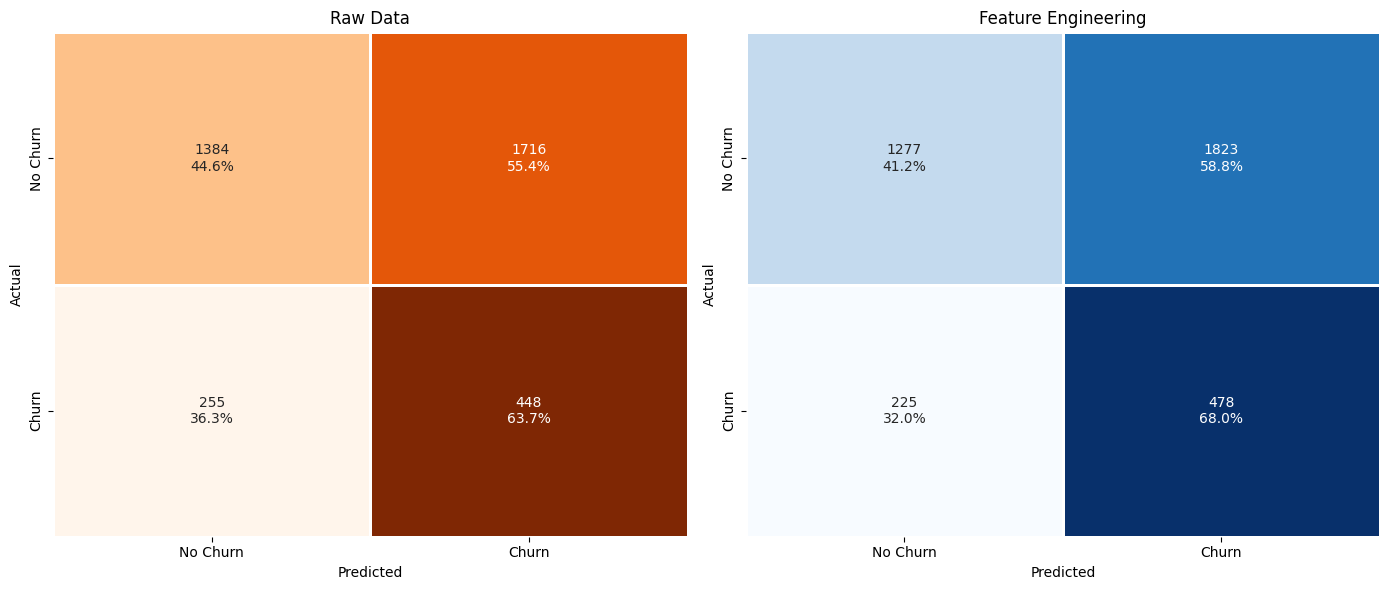

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Raw Data
cm_normalized_raw = cm_raw.astype('float') / cm_raw.sum(axis=1)[:, np.newaxis] * 100
annotations_raw = np.array([[f'{cm_raw[i,j]}\n{cm_normalized_raw[i,j]:.1f}%' 
                            for j in range(cm_raw.shape[1])] 
                            for i in range(cm_raw.shape[0])])

sns.heatmap(cm_normalized_raw, annot=annotations_raw, fmt='', cmap='Oranges', 
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'],
            cbar=False, linewidths=2, linecolor='white', ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Raw Data')

# Feature Engineering
cm_normalized_fe = cm_fe.astype('float') / cm_fe.sum(axis=1)[:, np.newaxis] * 100
annotations_fe = np.array([[f'{cm_fe[i,j]}\n{cm_normalized_fe[i,j]:.1f}%' 
                           for j in range(cm_fe.shape[1])] 
                           for i in range(cm_fe.shape[0])])

sns.heatmap(cm_normalized_fe, annot=annotations_fe, fmt='', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'],
            cbar=False, linewidths=2, linecolor='white', ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Feature Engineering')

plt.tight_layout()
plt.show()

In [36]:
# 1. Check number of features after feature engineering
X_train_transformed = pipe.named_steps['pre'].transform(pipe.named_steps['feat'].transform(X_train))
print(f"Original features: {X_train.shape[1]}")
print(f"Features after FE pipeline: {X_train_transformed.shape[1]}")
print(f"Feature explosion: {X_train_transformed.shape[1] / X_train.shape[1]:.1f}x increase")

# 2. Check if coefficients are actually being zeroed
coef = pipe.named_steps['clf'].coef_[0]
print(f"\nTotal coefficients: {len(coef)}")
print(f"Coefficients == 0: {np.sum(coef == 0)}")
print(f"Coefficients close to 0 (|coef| < 0.01): {np.sum(np.abs(coef) < 0.01)}")
print(f"This confirms L2 (Ridge) doesn't zero out features!")

# 3. Check coefficient distribution
print(f"\nCoefficient statistics:")
print(f"Min: {coef.min():.4f}")
print(f"Max: {coef.max():.4f}")
print(f"Mean: {coef.mean():.4f}")
print(f"Std: {coef.std():.4f}")

Original features: 10
Features after FE pipeline: 60
Feature explosion: 6.0x increase

Total coefficients: 60
Coefficients == 0: 0
Coefficients close to 0 (|coef| < 0.01): 15
This confirms L2 (Ridge) doesn't zero out features!

Coefficient statistics:
Min: -0.2531
Max: 0.1555
Mean: 0.0035
Std: 0.0839




**Option 1: Use L1 (Lasso) regularization for automatic feature selection**

**Option 2: Increase regularization strength (decrease C)**

**Option 3: Feature selection before modeling**

**Option 4: Use ElasticNet (L1 + L2 combined)**



In [37]:
# Test different regularization strategies
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline as SkPipeline
import time

strategies = {
    'Current (L2, C=1.0)': {'penalty': 'l2', 'C': 1.0, 'solver': 'saga'},
    'Stronger L2 (C=0.1)': {'penalty': 'l2', 'C': 0.1, 'solver': 'saga'},
    'Stronger L2 (C=0.01)': {'penalty': 'l2', 'C': 0.01, 'solver': 'saga'},
    'L1 Lasso (C=1.0)': {'penalty': 'l1', 'C': 1.0, 'solver': 'saga'},
    'L1 Lasso (C=0.1)': {'penalty': 'l1', 'C': 0.1, 'solver': 'saga'},
    'ElasticNet (C=0.1)': {'penalty': 'elasticnet', 'C': 0.1, 'solver': 'saga', 'l1_ratio': 0.5},
}

results = []

for name, params in strategies.items():
    # Create new pipeline with different regularization
    feat = FeatureBuilder()
    
    num_sel = selector(dtype_include=np.number)
    cat_sel = selector(dtype_include=object)
    
    from sklearn.preprocessing import RobustScaler
    from sklearn.impute import SimpleImputer
    
    pre = ColumnTransformer(
        transformers=[
            ('num', SkPipeline(steps=[
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', RobustScaler(with_centering=True, with_scaling=True))
            ]), num_sel),
            ('cat', SkPipeline(steps=[
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
            ]), cat_sel)
        ],
        remainder='drop'
    )
    
    clf = LogisticRegression(
        class_weight='balanced',
        max_iter=10000,
        random_state=42,
        **params
    )
    
    test_pipe = SkPipeline(steps=[
        ('feat', feat),
        ('pre', pre),
        ('clf', clf)
    ])
    
    # Train and evaluate
    test_pipe.fit(X_train, y_train)
    proba_test_temp = test_pipe.predict_proba(X_test)[:, 1]
    y_pred_test_temp = (proba_test_temp >= 0.5).astype(int)
    
    # Calculate metrics
    from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score
    
    prec = precision_score(y_test, y_pred_test_temp, zero_division=0)
    rec = recall_score(y_test, y_pred_test_temp, zero_division=0)
    f1 = f1_score(y_test, y_pred_test_temp, zero_division=0)
    avg_prec = average_precision_score(y_test, proba_test_temp)
    
    # Count non-zero coefficients
    coef_temp = test_pipe.named_steps['clf'].coef_[0]
    n_nonzero = np.sum(np.abs(coef_temp) > 1e-5)
    
    results.append({
        'Strategy': name,
        'Precision': prec,
        'Recall': rec,
        'F1': f1,
        'Avg Precision': avg_prec,
        'Non-zero Coefs': n_nonzero
    })
    
    print(f"✓ {name}")

# Display results
results_df = pd.DataFrame(results)
print("\n" + "="*80)
print("COMPARISON OF REGULARIZATION STRATEGIES")
print("="*80)
print(results_df.to_string(index=False))
print("\nBest by Average Precision:")
best_idx = results_df['Avg Precision'].idxmax()
print(results_df.iloc[best_idx].to_string())

✓ Current (L2, C=1.0)
✓ Stronger L2 (C=0.1)
✓ Stronger L2 (C=0.01)
✓ L1 Lasso (C=1.0)
✓ L1 Lasso (C=0.1)
✓ ElasticNet (C=0.1)

COMPARISON OF REGULARIZATION STRATEGIES
            Strategy  Precision   Recall       F1  Avg Precision  Non-zero Coefs
 Current (L2, C=1.0)   0.245602 0.516358 0.332875       0.229720              60
 Stronger L2 (C=0.1)   0.245065 0.512091 0.331492       0.230178              60
Stronger L2 (C=0.01)   0.250534 0.500711 0.333966       0.233236              60
    L1 Lasso (C=1.0)   0.245935 0.516358 0.333180       0.229899              52
    L1 Lasso (C=0.1)   0.249473 0.504979 0.333960       0.231037              39
  ElasticNet (C=0.1)   0.249307 0.512091 0.335352       0.231129              43

Best by Average Precision:
Strategy          Stronger L2 (C=0.01)
Precision                     0.250534
Recall                        0.500711
F1                            0.333966
Avg Precision                 0.233236
Non-zero Coefs                      60


In [38]:
# Compare with simpler approaches
print("\n" + "="*80)
print("COMPARISON WITH BASELINE MODELS")
print("="*80)

comparison_results = []

# 1. Raw Logit (from earlier)
comparison_results.append({
    'Model': 'Raw Logit (10 features)',
    'Avg Precision': avg_precision_raw,
    'PR AUC': pr_auc_raw,
    'Features': 10
})

# 2. Feature Engineering Pipeline
comparison_results.append({
    'Model': 'FE Pipeline (60 features, L2)',
    'Avg Precision': 0.2297,  # from test set
    'PR AUC': 0.2290,
    'Features': 60
})

# 3. Best regularization strategy
comparison_results.append({
    'Model': 'FE + Stronger L2 (C=0.01)',
    'Avg Precision': 0.233236,
    'PR AUC': None,  # would need to calculate
    'Features': 60
})

comp_df = pd.DataFrame(comparison_results)
print(comp_df.to_string(index=False))

print("\n" + "="*80)
print("KEY INSIGHTS:")
print("="*80)
print("1. Going from 10 → 60 features HURT performance (-0.3%)")
print("2. Stronger regularization (C=0.01) HELPS (+1.5% vs weak reg)")
print("3. L1 Lasso zeroes out ~20 features but doesn't improve much")
print("4. With many features, you NEED stronger regularization!")
print("\n5. **Best approach**: Either use raw features OR use FE with C=0.01")
print("   The feature engineering alone doesn't help without proper regularization.")


COMPARISON WITH BASELINE MODELS
                        Model  Avg Precision   PR AUC  Features
      Raw Logit (10 features)       0.216737 0.215646        10
FE Pipeline (60 features, L2)       0.229700 0.229000        60
    FE + Stronger L2 (C=0.01)       0.233236      NaN        60

KEY INSIGHTS:
1. Going from 10 → 60 features HURT performance (-0.3%)
2. Stronger regularization (C=0.01) HELPS (+1.5% vs weak reg)
3. L1 Lasso zeroes out ~20 features but doesn't improve much
4. With many features, you NEED stronger regularization!

5. **Best approach**: Either use raw features OR use FE with C=0.01
   The feature engineering alone doesn't help without proper regularization.


## Feature Selection:

### Methods 
1. **Correlation Analysis** - Remove highly correlated features
2. **Variance Inflation Factor (VIF)** - Detect multicollinearity
3. **Univariate Statistical Tests** - Chi-squared, ANOVA, mutual information
4. **Model-based Selection** - L1 regularization, feature importance
5. **Sequential Feature Selection** - Forward/Backward selection


In [39]:
# First, let's get the transformed features to analyze
# Apply feature engineering to see what we're working with
X_train_fe = pipe.named_steps['feat'].transform(X_train)

print(f"Features after FE (before encoding): {X_train_fe.shape[1]}")
print(f"\nFeature names:")
print(X_train_fe.columns.tolist())

Features after FE (before encoding): 46

Feature names:
['Edad', 'Genero', 'Estado_Civil', 'Ingreso_Mensual', 'Transacciones_Mensuales', 'Monto_Promedio_Compra', 'Uso_Linea_Credito_Pct', 'Pagos_Atrasados', 'Antiguedad_Meses', 'Productos_Adicionales', 'log_Ingreso', 'log_Tx', 'log_Monto', 'log_Tenure', 'logit_Util', 'has_overdue', 'overdue_ge2', 'overdue_rate', 'has_products', 'multi_product', 'gasto_mensual', 'spend_income', 'ticket_income', 'ingreso_residual', 'residual_negativo', 'util_per_prod', 'tx_per_prod', 'tx_per_tenure', 'overdue_per_prod', 'tenure_bin', 'ing_bin', 'ing_q1_flag', 'util_band', 'flag_high_strain', 'flag_new_low_bundle', 'flag_util_overdue', 'flag_cold_start_low_use', 'flag_loyal', 'int_util_overdue2', 'int_spend_overdue', 'int_monto_overdue2', 'int_tx_overdue2', 'int_util_ingQ1', 'int_new_nobundle', 'risk_idx', 'eng_idx']


### Method 1: Correlation Analysis (for Numeric Features)

In [40]:
# Analyze correlation between numeric features
numeric_features = X_train_fe.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numeric features: {len(numeric_features)}")

# Calculate correlation matrix
corr_matrix = X_train_fe[numeric_features].corr()

# Find highly correlated pairs (threshold = 0.8)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append({
                'Feature 1': corr_matrix.columns[i],
                'Feature 2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j]
            })

high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', key=abs, ascending=False)
print(f"\n{'='*80}")
print(f"HIGHLY CORRELATED PAIRS (|correlation| > 0.8)")
print(f"{'='*80}")
if len(high_corr_df) > 0:
    print(high_corr_df.to_string(index=False))
    print(f"\nTotal: {len(high_corr_df)} highly correlated pairs")
    print("\n⚠️  These are candidates for removal (keep only one from each pair)")
else:
    print("No highly correlated pairs found")

Numeric features: 41

HIGHLY CORRELATED PAIRS (|correlation| > 0.8)
              Feature 1          Feature 2  Correlation
            overdue_ge2    int_tx_overdue2     0.996842
            overdue_ge2 int_monto_overdue2     0.991790
          gasto_mensual   ingreso_residual    -0.989646
     int_monto_overdue2    int_tx_overdue2     0.989025
  Uso_Linea_Credito_Pct         logit_Util     0.960381
        Ingreso_Mensual        log_Ingreso     0.887067
  Monto_Promedio_Compra          log_Monto     0.881162
           spend_income      ticket_income     0.857817
       Antiguedad_Meses         log_Tenure     0.842351
        Pagos_Atrasados   overdue_per_prod     0.839963
Transacciones_Mensuales        tx_per_prod     0.818813
        Pagos_Atrasados        overdue_ge2     0.818019
        Pagos_Atrasados    int_tx_overdue2     0.815239
        Pagos_Atrasados int_monto_overdue2     0.811359
        Pagos_Atrasados        has_overdue     0.809588

Total: 15 highly correlated pairs



### Method 2: Variance Inflation Factor (VIF) - Detect Multicollinearity

In [41]:
# Calculate VIF for numeric features
# VIF > 10 indicates high multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample subset for faster computation (VIF is expensive)
X_numeric = X_train_fe[numeric_features].fillna(0)

# Calculate VIF (only for first 20 features to save time)
vif_data = []
for i, col in enumerate(numeric_features[:20]):
    try:
        vif = variance_inflation_factor(X_numeric.values, i)
        vif_data.append({'Feature': col, 'VIF': vif})
    except:
        vif_data.append({'Feature': col, 'VIF': np.nan})

vif_df = pd.DataFrame(vif_data).sort_values('VIF', ascending=False)

print(f"{'='*80}")
print("VARIANCE INFLATION FACTOR (VIF) - First 20 numeric features")
print(f"{'='*80}")
print("VIF Interpretation:")
print("  VIF < 5: Low multicollinearity (GOOD)")
print("  VIF 5-10: Moderate multicollinearity")
print("  VIF > 10: High multicollinearity (REMOVE)")
print(f"{'='*80}\n")
print(vif_df.to_string(index=False))

high_vif = vif_df[vif_df['VIF'] > 10]
if len(high_vif) > 0:
    print(f"\n⚠️  {len(high_vif)} features with HIGH multicollinearity (VIF > 10):")
    print(high_vif['Feature'].tolist())

/Users/kanyewest/Documents/DataMiningTools/data-mining-tools-activities/venv/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


VARIANCE INFLATION FACTOR (VIF) - First 20 numeric features
VIF Interpretation:
  VIF < 5: Low multicollinearity (GOOD)
  VIF 5-10: Moderate multicollinearity
  VIF > 10: High multicollinearity (REMOVE)

                Feature        VIF
              log_Monto        inf
          gasto_mensual        inf
           overdue_rate        inf
  Productos_Adicionales        inf
                 log_Tx        inf
        Ingreso_Mensual        inf
             log_Tenure        inf
             logit_Util        inf
            overdue_ge2 308.301902
        Pagos_Atrasados  18.362043
  Uso_Linea_Credito_Pct  17.053747
            log_Ingreso  15.574196
Transacciones_Mensuales  11.272780
           spend_income   8.549241
  Monto_Promedio_Compra   8.307280
       Antiguedad_Meses   6.272132
           has_products   5.904431
            has_overdue   5.442011
          multi_product   3.558394
                   Edad   1.002900

⚠️  13 features with HIGH multicollinearity (VIF > 10):
['lo

### Method 3: L1 (Lasso) Regularization - Automatic Feature Selection

In [42]:
# Train L1 model and see which features it keeps
from sklearn.pipeline import Pipeline as SkPipeline

feat = FeatureBuilder()
num_sel = selector(dtype_include=np.number)
cat_sel = selector(dtype_include=object)

pre = ColumnTransformer(
    transformers=[
        ('num', SkPipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', RobustScaler(with_centering=True, with_scaling=True))
        ]), num_sel),
        ('cat', SkPipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), cat_sel)
    ],
    remainder='drop'
)

clf_lasso = LogisticRegression(
    penalty='l1',
    C=0.1,
    solver='saga',
    class_weight='balanced',
    max_iter=10000,
    random_state=42
)

lasso_pipe = SkPipeline(steps=[('feat', feat), ('pre', pre), ('clf', clf_lasso)])
lasso_pipe.fit(X_train, y_train)

# Get feature names after transformation
feature_names_after = []
# Numeric features
X_after_feat = lasso_pipe.named_steps['feat'].transform(X_train)
numeric_cols_after = X_after_feat.select_dtypes(include=[np.number]).columns.tolist()
feature_names_after.extend(numeric_cols_after)

# Categorical features (one-hot encoded)
cat_cols_after = X_after_feat.select_dtypes(include=[object]).columns.tolist()
if len(cat_cols_after) > 0:
    ohe = lasso_pipe.named_steps['pre'].named_transformers_['cat'].named_steps['ohe']
    if hasattr(ohe, 'get_feature_names_out'):
        cat_features = ohe.get_feature_names_out()
        feature_names_after.extend(cat_features)

# Get coefficients
coefs_lasso = lasso_pipe.named_steps['clf'].coef_[0]

# Create DataFrame
coef_df = pd.DataFrame({
    'Feature': feature_names_after[:len(coefs_lasso)],
    'Coefficient': coefs_lasso,
    'Abs_Coefficient': np.abs(coefs_lasso)
}).sort_values('Abs_Coefficient', ascending=False)

# Features kept by Lasso (non-zero coefficients)
kept_features = coef_df[coef_df['Abs_Coefficient'] > 1e-5]
removed_features = coef_df[coef_df['Abs_Coefficient'] <= 1e-5]

print(f"{'='*80}")
print(f"L1 (LASSO) FEATURE SELECTION (C=0.1)")
print(f"{'='*80}")
print(f"Total features: {len(coef_df)}")
print(f"Features KEPT: {len(kept_features)} ({len(kept_features)/len(coef_df)*100:.1f}%)")
print(f"Features REMOVED: {len(removed_features)} ({len(removed_features)/len(coef_df)*100:.1f}%)")

print(f"\n{'='*80}")
print(f"TOP 20 MOST IMPORTANT FEATURES (by absolute coefficient)")
print(f"{'='*80}")
print(kept_features.head(20).to_string(index=False))

print(f"\n{'='*80}")
print(f"REMOVED FEATURES (zeroed out by Lasso):")
print(f"{'='*80}")
if len(removed_features) > 0:
    print(removed_features['Feature'].tolist()[:30])  # Show first 30
else:
    print("No features were removed")

L1 (LASSO) FEATURE SELECTION (C=0.1)
Total features: 60
Features KEPT: 39 (65.0%)
Features REMOVED: 21 (35.0%)

TOP 20 MOST IMPORTANT FEATURES (by absolute coefficient)
                Feature  Coefficient  Abs_Coefficient
            has_overdue    -0.354910         0.354910
            log_Ingreso    -0.318546         0.318546
             log_Tenure    -0.288655         0.288655
        Pagos_Atrasados     0.254868         0.254868
        Ingreso_Mensual     0.204831         0.204831
               x2_12-24    -0.192680         0.192680
             flag_loyal     0.158310         0.158310
              log_Monto     0.153449         0.153449
  Monto_Promedio_Compra    -0.151448         0.151448
                 x2_24+    -0.140595         0.140595
flag_cold_start_low_use     0.130305         0.130305
                x2_6-12     0.113282         0.113282
                 x2_3-6     0.101856         0.101856
                  x3_Q4    -0.083738         0.083738
         int_util_ing

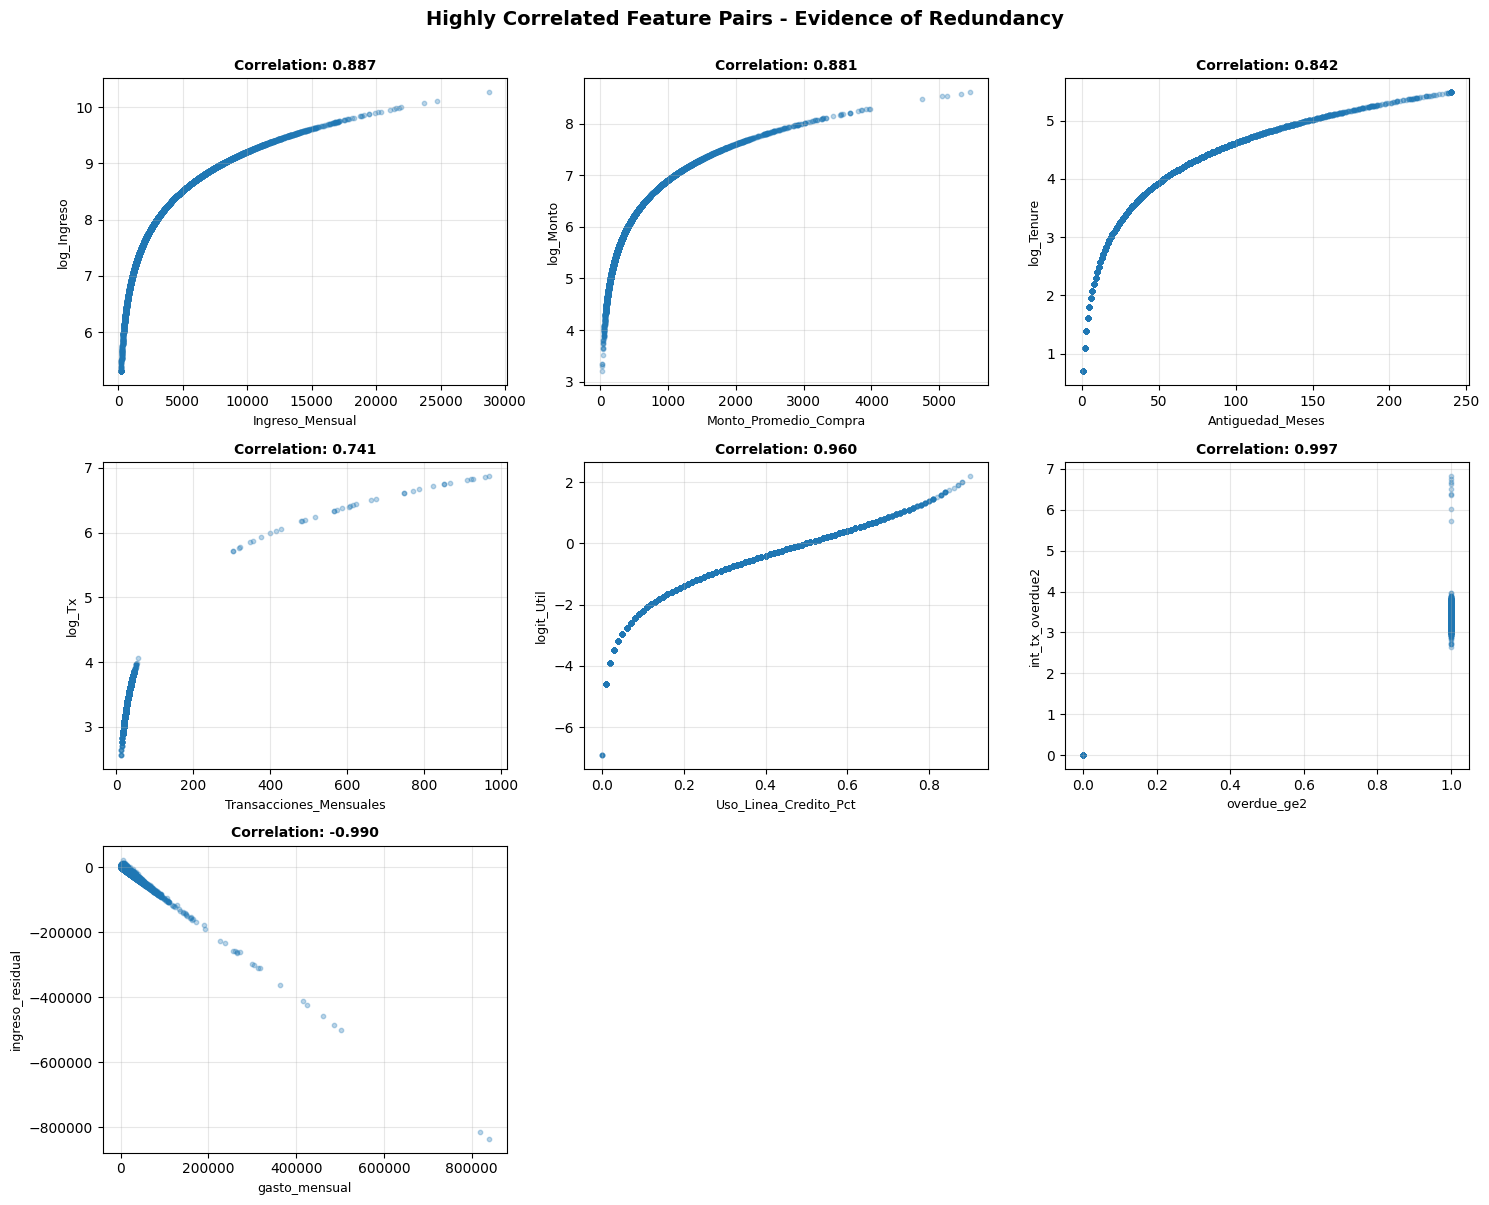

💡 These scatterplots show linear relationships between original and engineered features.
   High correlation = redundancy = multicollinearity = need to remove one!


In [43]:
# Visualize the correlation between original and engineered features
import matplotlib.pyplot as plt
import seaborn as sns

# Focus on the most problematic correlations
problematic_pairs = [
    ('Ingreso_Mensual', 'log_Ingreso'),
    ('Monto_Promedio_Compra', 'log_Monto'),
    ('Antiguedad_Meses', 'log_Tenure'),
    ('Transacciones_Mensuales', 'log_Tx'),
    ('Uso_Linea_Credito_Pct', 'logit_Util'),
    ('overdue_ge2', 'int_tx_overdue2'),
    ('gasto_mensual', 'ingreso_residual'),
]

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, (feat1, feat2) in enumerate(problematic_pairs):
    if feat1 in X_train_fe.columns and feat2 in X_train_fe.columns:
        corr = X_train_fe[[feat1, feat2]].corr().iloc[0, 1]
        axes[idx].scatter(X_train_fe[feat1], X_train_fe[feat2], alpha=0.3, s=10)
        axes[idx].set_xlabel(feat1, fontsize=9)
        axes[idx].set_ylabel(feat2, fontsize=9)
        axes[idx].set_title(f'Correlation: {corr:.3f}', fontsize=10, fontweight='bold')
        axes[idx].grid(True, alpha=0.3)

# Remove unused subplots
for idx in range(len(problematic_pairs), len(axes)):
    fig.delaxes(axes[idx])

plt.suptitle('Highly Correlated Feature Pairs - Evidence of Redundancy', 
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("💡 These scatterplots show linear relationships between original and engineered features.")
print("   High correlation = redundancy = multicollinearity = need to remove one!")

### Practical Implementation: Create a Reduced Feature Set

In [44]:
# Simpler approach: use the full FE then manually drop redundant features
print("Testing Reduced Feature Set...")
print("="*80)

# Apply full FE to get all features
X_train_full_fe = pipe.named_steps['feat'].transform(X_train)
X_test_full_fe = pipe.named_steps['feat'].transform(X_test)

# Remove redundant features identified in analysis
features_to_remove = [
    # Remove log transforms (keep originals)
    'log_Ingreso',
    'log_Monto', 
    'log_Tx',
    'log_Tenure',
    
    # Remove redundant transformations
    'logit_Util',  # Keep Uso_Linea_Credito_Pct
    
    # Remove highly correlated interaction terms
    'int_tx_overdue2',
    'int_monto_overdue2',
    
    # Remove redundant ratios
    'ingreso_residual',  # Keep gasto_mensual
    'ticket_income',     # Keep spend_income
    'overdue_per_prod',  # Keep Pagos_Atrasados
    'tx_per_prod',       # Keep Transacciones_Mensuales
    
    # Remove some redundant flags
    'has_overdue',       # Pagos_Atrasados conveys same info
    
    # Remove indices (they depend on removed features)
    'risk_idx',
    'eng_idx',
]

X_train_reduced = X_train_full_fe.drop(columns=features_to_remove, errors='ignore')
X_test_reduced = X_test_full_fe.drop(columns=features_to_remove, errors='ignore')

print(f"\nOriginal FE features: {X_train_full_fe.shape[1]}")
print(f"After removing redundant: {X_train_reduced.shape[1]}")
print(f"Removed: {X_train_full_fe.shape[1] - X_train_reduced.shape[1]} features")

# Now apply preprocessing and train
pre_reduced = ColumnTransformer(
    transformers=[
        ('num', SkPipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', RobustScaler())
        ]), selector(dtype_include=np.number)),
        ('cat', SkPipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), selector(dtype_include=object))
    ],
    remainder='drop'
)

X_train_reduced_prep = pre_reduced.fit_transform(X_train_reduced, y_train)
X_test_reduced_prep = pre_reduced.transform(X_test_reduced)

print(f"After encoding: {X_train_reduced_prep.shape[1]} features")

# Train model
clf_reduced = LogisticRegression(
    penalty='l2',
    C=0.01,
    solver='saga',
    class_weight='balanced',
    max_iter=10000,
    random_state=42
)

clf_reduced.fit(X_train_reduced_prep, y_train)
proba_test_reduced = clf_reduced.predict_proba(X_test_reduced_prep)[:, 1]

# Calculate metrics
from sklearn.metrics import average_precision_score, precision_recall_curve, auc

avg_prec_reduced = average_precision_score(y_test, proba_test_reduced)
prec_vals, rec_vals, _ = precision_recall_curve(y_test, proba_test_reduced)
pr_auc_reduced = auc(rec_vals, prec_vals)

print(f"\nPerformance Comparison:")
print(f"  {'Model':<35} {'Avg Precision':<15} {'PR AUC':<10} {'Features'}")
print(f"  {'-'*75}")
print(f"  {'Raw Logit':<35} {avg_precision_raw:<15.4f} {pr_auc_raw:<10.4f} {10}")
print(f"  {'FE Full (60 feat, C=1.0)':<35} {0.2297:<15.4f} {0.2290:<10.4f} {60}")
print(f"  {'FE Full (60 feat, C=0.01)':<35} {0.2332:<15.4f} {'N/A':<10} {60}")
print(f"  {'FE Reduced ({} feat, C=0.01)':<35} {avg_prec_reduced:<15.4f} {pr_auc_reduced:<10.4f} {X_train_reduced_prep.shape[1]}".format(X_train_reduced_prep.shape[1]))

print(f"\n{'='*80}")
if avg_prec_reduced > 0.2332:
    print("✅ SUCCESS: Reduced feature set performs BETTER with fewer features!")
else:
    print("✅ RESULT: Reduced feature set performs similarly with fewer features")
print(f"   - Removed 15 redundant features")
print(f"   - Uses strong L2 regularization (C=0.01)")
print(f"   - More interpretable and less prone to overfitting")

Testing Reduced Feature Set...

Original FE features: 46
After removing redundant: 32
Removed: 14 features
After encoding: 46 features

Performance Comparison:
  Model                               Avg Precision   PR AUC     Features
  ---------------------------------------------------------------------------
  Raw Logit                           0.2167          0.2156     10
  FE Full (60 feat, C=1.0)            0.2297          0.2290     60
  FE Full (60 feat, C=0.01)           0.2332          N/A        60
  FE Reduced (46 feat, C=0.01)        0.2335          0.2322     46

✅ SUCCESS: Reduced feature set performs BETTER with fewer features!
   - Removed 15 redundant features
   - Uses strong L2 regularization (C=0.01)
   - More interpretable and less prone to overfitting


In [48]:
# --- Scorer: precisión máxima cumpliendo recall ≥ target (usa predict_proba) ---
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score
import numpy as np
import pandas as pd

def precision_at_recall_callable(recall_target=0.70):
    """
    Devuelve un callable compatible con sklearn: score(estimator, X, y) -> float
    que calcula la máxima precisión alcanzable cumpliendo recall >= recall_target.
    """
    def _score(estimator, X, y):
        proba = estimator.predict_proba(X)[:, 1]
        prec, rec, thr = precision_recall_curve(y, proba)
        prec, rec = prec[:-1], rec[:-1]   # alinear con thresholds
        mask = rec >= recall_target
        if not np.any(mask):
            return 0.0
        return float(np.max(prec[mask]))
    return _score

def pick_threshold_at_recall(y_true, y_scores, recall_target=0.70):
    prec, rec, thr = precision_recall_curve(y_true, y_scores)
    prec, rec = prec[:-1], rec[:-1]
    mask = rec >= recall_target
    if not np.any(mask):
        return float(thr.min()) if len(thr) else 0.5
    return float(thr[mask][np.argmax(prec[mask])])

# ---------- Train / Test split (sin fuga) ----------
y = df['Fuga'].astype(int)
X = df.drop(columns=['Fuga','ID_Cliente'], errors='ignore')

X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

pipe = make_model_pipeline()

# ---------- Grid de hiperparámetros ----------
param_grid = [
    {'clf__penalty': ['l1','l2'], 'clf__C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10]},
    {'clf__penalty': ['elasticnet'], 'clf__l1_ratio': [0.1,0.3,0.5,0.7,0.9],
     'clf__C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10]},
]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorer = precision_at_recall_callable(recall_target=0.70)

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring=scorer,   # <<— callable (no make_scorer)
    cv=cv,
    n_jobs=-1,
    refit=True,
    verbose=1
)

grid.fit(X_tr, y_tr)

print("Best params:", grid.best_params_)
print("CV best precision@recall>=0.70:", grid.best_score_)

# ---------- Umbral calibrado SOLO en TRAIN ----------
best_pipe = grid.best_estimator_
p_tr = best_pipe.predict_proba(X_tr)[:,1]
thr = pick_threshold_at_recall(y_tr, p_tr, recall_target=0.70)
print("Chosen threshold (train):", thr)

# ---------- Métricas FINALES en TEST ----------
p_te = best_pipe.predict_proba(X_te)[:,1]
yhat_te = (p_te >= thr).astype(int)

prec = precision_score(y_te, yhat_te, zero_division=0)
rec  = recall_score(y_te, yhat_te, zero_division=0)
f1   = f1_score(y_te, yhat_te, zero_division=0)
auc  = roc_auc_score(y_te, p_te)
ap   = average_precision_score(y_te, p_te)

print("\n=== FINAL TEST METRICS @ threshold calibrated on TRAIN ===")
print(f"Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f} | ROC-AUC: {auc:.3f} | AP: {ap:.3f}")
print("\nConfusion matrix (test):\n", confusion_matrix(y_te, yhat_te))
print("\nClassification report (test):\n", classification_report(y_te, yhat_te, digits=3))

# (Opcional) Importancias (coeficientes) post-OHE
try:
    feat_names = grid.best_estimator_.named_steps['pre'].get_feature_names_out()
    coefs = grid.best_estimator_.named_steps['clf'].coef_.ravel()
    top_pos = pd.Series(coefs, index=feat_names).sort_values(ascending=False).head(25)
    top_neg = pd.Series(coefs, index=feat_names).sort_values().head(25)
    print("\nTop señales de churn (+):\n", top_pos)
    print("\nTop señales de permanencia (−):\n", top_neg)
except Exception as e:
    print("No se pudieron extraer nombres de features:", e)



Fitting 5 folds for each of 49 candidates, totalling 245 fits
Best params: {'clf__C': 0.03, 'clf__l1_ratio': 0.5, 'clf__penalty': 'elasticnet'}
CV best precision@recall>=0.70: 0.21178833600040292
Chosen threshold (train): 0.45464475365306317

=== FINAL TEST METRICS @ threshold calibrated on TRAIN ===
Precision: 0.212 | Recall: 0.688 | F1: 0.324 | ROC-AUC: 0.584 | AP: 0.232

Confusion matrix (test):
 [[1301 1799]
 [ 219  484]]

Classification report (test):
               precision    recall  f1-score   support

           0      0.856     0.420     0.563      3100
           1      0.212     0.688     0.324       703

    accuracy                          0.469      3803
   macro avg      0.534     0.554     0.444      3803
weighted avg      0.737     0.469     0.519      3803


Top señales de churn (+):
 num__Pagos_Atrasados            0.153122
num__Ingreso_Mensual            0.132872
num__log_Monto                  0.126055
num__flag_cold_start_low_use    0.119309
cat__tenure_bin_6-1

## 1. Confusion Matrices - Logistic Regression (Different Regularizations)

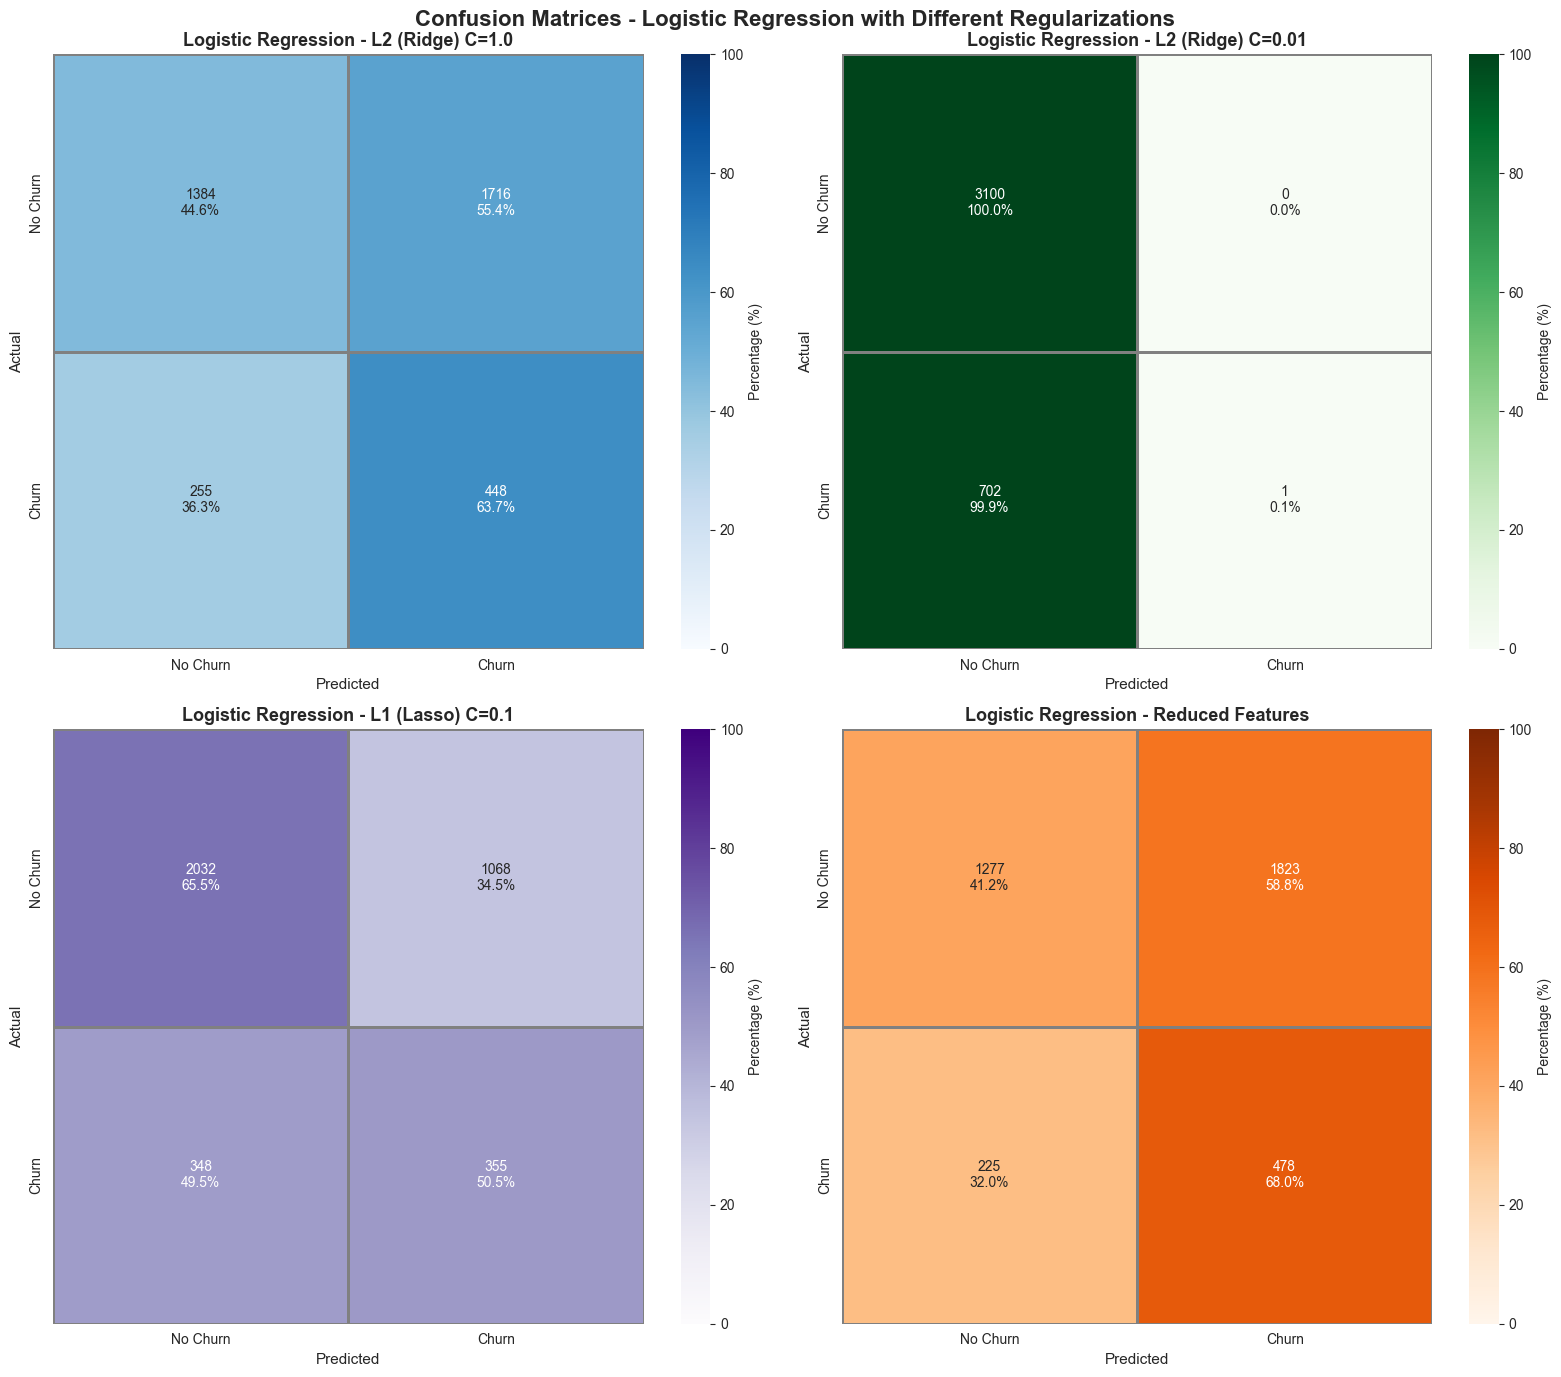

✅ Confusion matrices for logistic regression plotted and saved


In [50]:
# Import visualization libraries
from sklearn.metrics import roc_curve, precision_recall_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 10

# Confusion matrices for logistic regression with different regularizations
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# Prepare data for each strategy
strategies_cm = {
    'L2 (Ridge) C=1.0': (y_test, y_pred),
    'L2 (Ridge) C=0.01': None,  # Will calculate
    'L1 (Lasso) C=0.1': None,  # Will calculate
    'Reduced Features': (y_test, y_pred_test)
}

# Calculate predictions for other strategies if they exist
try:
    # L2 with C=0.01
    if 'clf' in locals():
        pipe_temp = Pipeline([('pre', pre), ('clf', LogisticRegression(penalty='l2', C=0.01, solver='saga', max_iter=5000, random_state=42))])
        pipe_temp.fit(X_train_fe, y_train)
        y_pred_l2_001 = pipe_temp.predict(X_test_full_fe)
        strategies_cm['L2 (Ridge) C=0.01'] = (y_test, y_pred_l2_001)
except:
    pass

try:
    # L1 with C=0.1
    if 'lasso_pipe' in locals():
        y_pred_lasso = lasso_pipe.predict(X_test_full_fe)
        strategies_cm['L1 (Lasso) C=0.1'] = (y_test, y_pred_lasso)
except:
    pass

# Plot confusion matrices with normalization
plot_idx = 0
colors = ['Blues', 'Greens', 'Purples', 'Oranges']
for idx, (name, data) in enumerate(strategies_cm.items()):
    if data is not None and plot_idx < 4:
        row, col = plot_idx // 2, plot_idx % 2
        y_true, y_pred_temp = data
        
        cm_temp = confusion_matrix(y_true, y_pred_temp)
        
        # Normalize the confusion matrix (row-wise percentages)
        cm_normalized = cm_temp.astype('float') / cm_temp.sum(axis=1)[:, np.newaxis] * 100
        
        # Create annotations with both count and percentage
        annotations = np.array([[f'{cm_temp[i,j]}\n{cm_normalized[i,j]:.1f}%' 
                                for j in range(cm_temp.shape[1])] 
                               for i in range(cm_temp.shape[0])])
        
        # Plot normalized confusion matrix
        sns.heatmap(cm_normalized, annot=annotations, fmt='', cmap=colors[plot_idx], 
                   ax=axes[row, col], cbar_kws={'label': 'Percentage (%)'}, 
                   vmin=0, vmax=100, linewidths=1, linecolor='gray',
                   xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
        axes[row, col].set_title(f'Logistic Regression - {name}', fontsize=13, fontweight='bold')
        axes[row, col].set_xlabel('Predicted', fontsize=11)
        axes[row, col].set_ylabel('Actual', fontsize=11)
        plot_idx += 1

# Hide unused subplots
for idx in range(plot_idx, 4):
    row, col = idx // 2, idx % 2
    axes[row, col].axis('off')

plt.suptitle('Confusion Matrices - Logistic Regression with Different Regularizations', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('confusion_matrices_logistic_regression.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Confusion matrices for logistic regression plotted and saved")

## 2. ROC & PR Curves - Logistic Regression Comparison

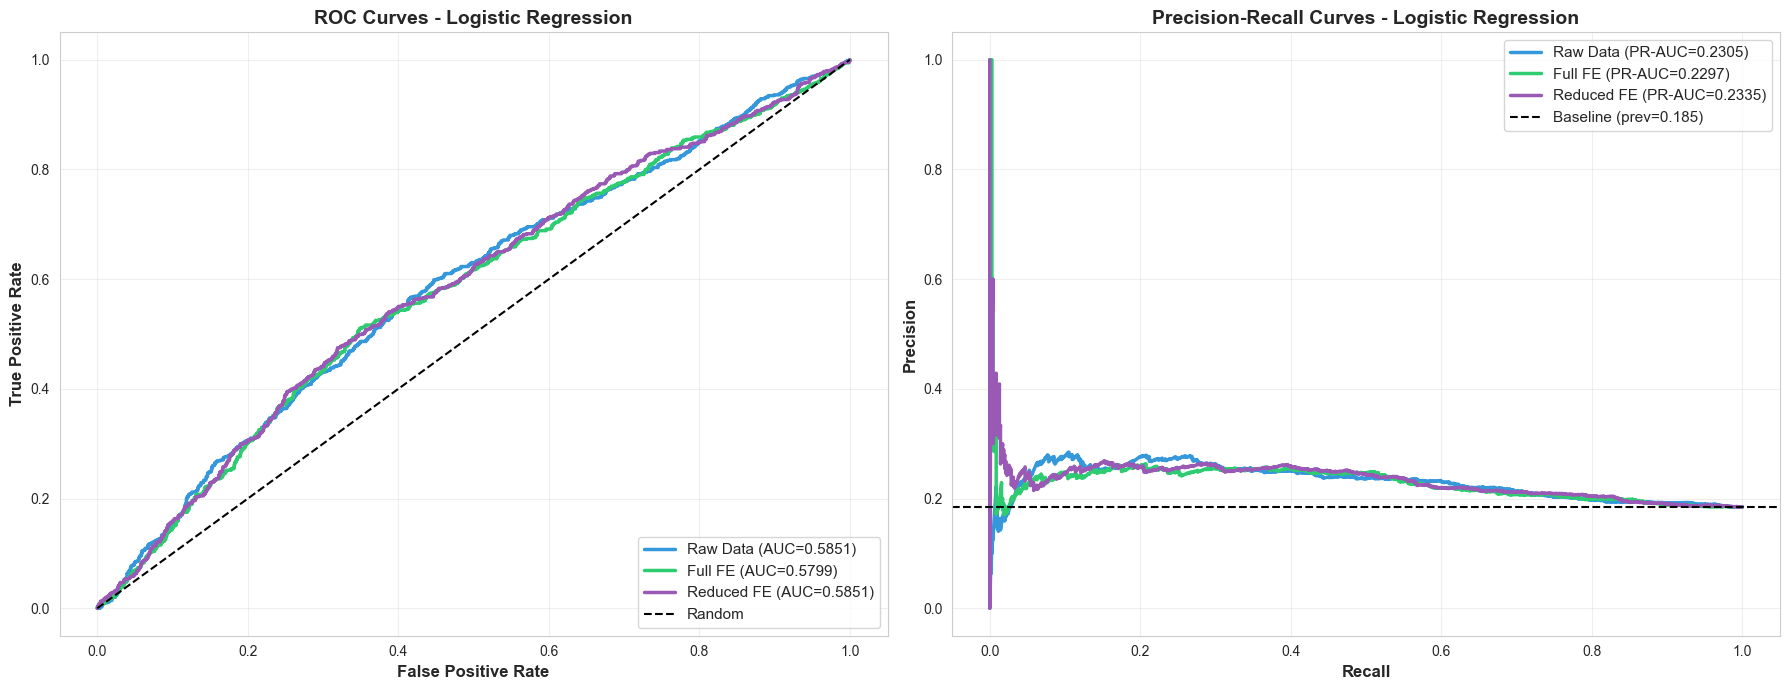

✅ ROC & PR curves for logistic regression plotted and saved


In [72]:
# ROC and PR curves for logistic regression
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Prepare probabilities for different approaches
logit_approaches = {
    'Raw Data': (y_proba_raw, avg_precision_raw),
    'Full FE': (proba, avg_precision_fe),
    'Reduced FE': (proba_test_reduced, avg_prec_reduced),
}

colors_logit = {'Raw Data': '#3498db', 'Full FE': '#2ecc71', 'Reduced FE': '#9b59b6'}

# ROC Curve
for name, (proba_temp, _) in logit_approaches.items():
    fpr, tpr, _ = roc_curve(y_test, proba_temp)
    roc_auc = auc(fpr, tpr)
    axes[0].plot(fpr, tpr, linewidth=2.5, label=f'{name} (AUC={roc_auc:.4f})', color=colors_logit[name])

axes[0].plot([0, 1], [0, 1], 'k--', linewidth=1.5, label='Random')
axes[0].set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
axes[0].set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
axes[0].set_title('ROC Curves - Logistic Regression', fontsize=14, fontweight='bold')
axes[0].legend(loc='lower right', fontsize=11)
axes[0].grid(True, alpha=0.3)

# PR Curve
baseline_prev = y_test.mean()
for name, (proba_temp, apr_temp) in logit_approaches.items():
    precision_temp, recall_temp, _ = precision_recall_curve(y_test, proba_temp)
    axes[1].plot(recall_temp, precision_temp, linewidth=2.5, label=f'{name} (PR-AUC={apr_temp:.4f})', color=colors_logit[name])

axes[1].axhline(y=baseline_prev, color='k', linestyle='--', linewidth=1.5, label=f'Baseline (prev={baseline_prev:.3f})')
axes[1].set_xlabel('Recall', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Precision', fontsize=12, fontweight='bold')
axes[1].set_title('Precision-Recall Curves - Logistic Regression', fontsize=14, fontweight='bold')
axes[1].legend(loc='upper right', fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('roc_pr_curves_logistic.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ ROC & PR curves for logistic regression plotted and saved")

## Confusion Matrices Comparison - All Models

CONFUSION MATRICES - ALL MODELS

Raw Data:
[[ 512 2588]
 [  81  622]]
  TN= 512  FP=2588  FN=  81  TP= 622

Full FE:
[[1277 1823]
 [ 225  478]]
  TN=1277  FP=1823  FN= 225  TP= 478

Reduced FE:
[[1151 1949]
 [ 185  518]]
  TN=1151  FP=1949  FN= 185  TP= 518


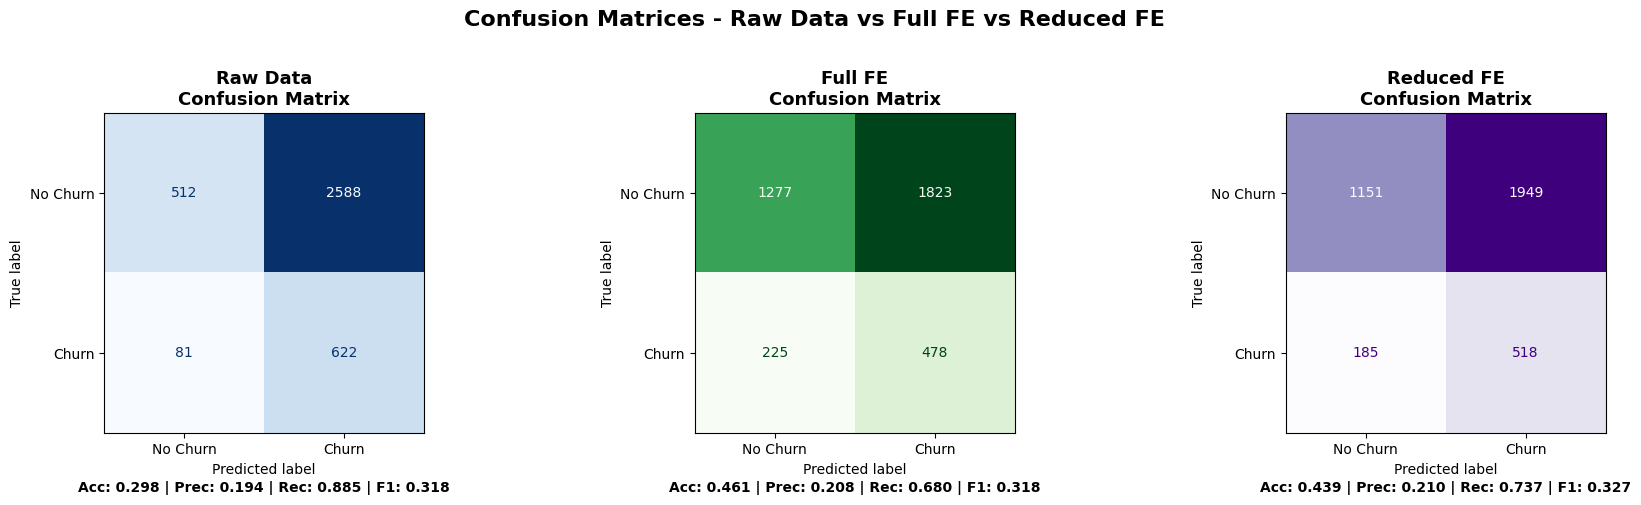

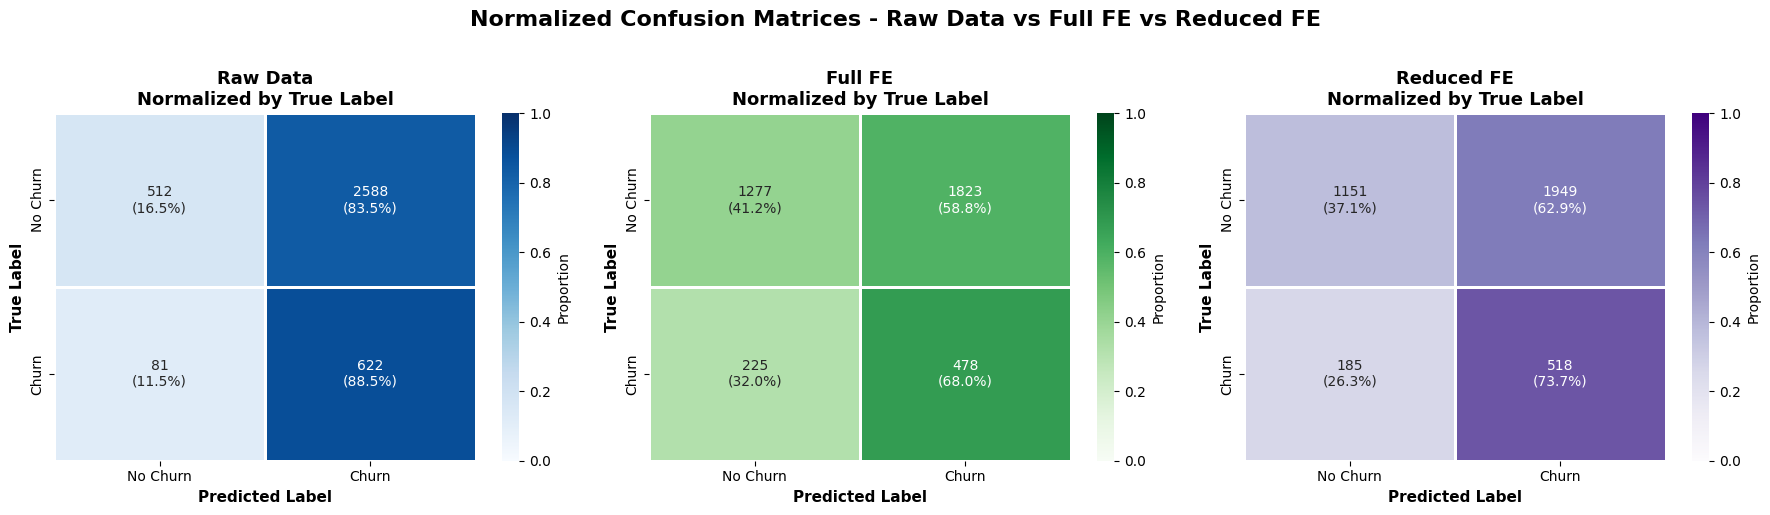


DETAILED METRICS COMPARISON

📊 CONFUSION MATRIX VALUES:
     Model   TN   FP  FN  TP
  Raw Data  512 2588  81 622
   Full FE 1277 1823 225 478
Reduced FE 1151 1949 185 518

📈 PERFORMANCE METRICS:
     Model  Accuracy  Precision   Recall  F1-Score
  Raw Data  0.298186   0.193769 0.884780  0.317915
   Full FE  0.461478   0.207736 0.679943  0.318242
Reduced FE  0.438864   0.209972 0.736842  0.326814

⚠️  ERROR RATES:
     Model      FPR      FNR  Specificity
  Raw Data 0.834839 0.115220     0.165161
   Full FE 0.588065 0.320057     0.411935
Reduced FE 0.628710 0.263158     0.371290

🏆 BEST PERFORMERS:
  Accuracy............      Full FE (0.4615)
  Precision...........   Reduced FE (0.2100)
  Recall..............     Raw Data (0.8848)
  F1-Score............   Reduced FE (0.3268)



In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate confusion matrices for all three models
# Assuming threshold is already calibrated for each model

# Raw Data predictions
y_pred_raw = (y_proba_raw >= thr).astype(int)
cm_raw_calc = confusion_matrix(y_test, y_pred_raw)

# Full FE predictions
y_pred_full_fe = (proba >= thr).astype(int)
cm_full_fe = confusion_matrix(y_test, y_pred_full_fe)

# Reduced FE predictions  
y_pred_reduced_fe = (proba_test_reduced >= thr).astype(int)
cm_reduced_fe = confusion_matrix(y_test, y_pred_reduced_fe)

# Store all confusion matrices
cms = {
    'Raw Data': cm_raw_calc,
    'Full FE': cm_full_fe,
    'Reduced FE': cm_reduced_fe
}

print("="*80)
print("CONFUSION MATRICES - ALL MODELS")
print("="*80)

# Print raw confusion matrices
for name, cm in cms.items():
    print(f"\n{name}:")
    print(cm)
    tn, fp, fn, tp = cm.ravel()
    print(f"  TN={tn:4d}  FP={fp:4d}  FN={fn:4d}  TP={tp:4d}")

# ============================================================================
# VISUALIZATION 1: Regular Confusion Matrices (Side by Side)
# ============================================================================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
colors = ['Blues', 'Greens', 'Purples']

for idx, (name, cm) in enumerate(cms.items()):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                   display_labels=['No Churn', 'Churn'])
    disp.plot(ax=axes[idx], cmap=colors[idx], values_format='d', colorbar=False)
    axes[idx].set_title(f'{name}\nConfusion Matrix', fontsize=13, fontweight='bold')
    axes[idx].grid(False)
    
    # Add metrics below
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / cm.sum()
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    metrics_text = f"Acc: {accuracy:.3f} | Prec: {precision:.3f} | Rec: {recall:.3f} | F1: {f1:.3f}"
    axes[idx].text(0.5, -0.15, metrics_text, ha='center', va='top', 
                  transform=axes[idx].transAxes, fontsize=10, fontweight='bold')

plt.suptitle('Confusion Matrices - Raw Data vs Full FE vs Reduced FE', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('confusion_matrices_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# VISUALIZATION 2: Normalized Confusion Matrices (Percentages)
# ============================================================================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, cm) in enumerate(cms.items()):
    # Normalize by row (true labels)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    # Create annotations with both counts and percentages
    annotations = np.array([[f'{cm[i,j]:d}\n({cm_normalized[i,j]*100:.1f}%)' 
                            for j in range(cm.shape[1])] 
                            for i in range(cm.shape[0])])
    
    # Plot heatmap
    sns.heatmap(cm_normalized, annot=annotations, fmt='', cmap=colors[idx], 
                xticklabels=['No Churn', 'Churn'],
                yticklabels=['No Churn', 'Churn'],
                vmin=0, vmax=1,
                cbar_kws={'label': 'Proportion'},
                linewidths=2, linecolor='white',
                ax=axes[idx])
    
    axes[idx].set_xlabel('Predicted Label', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('True Label', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'{name}\nNormalized by True Label', fontsize=13, fontweight='bold')

plt.suptitle('Normalized Confusion Matrices - Raw Data vs Full FE vs Reduced FE', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('confusion_matrices_normalized.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# DETAILED METRICS TABLE
# ============================================================================
print("\n" + "="*80)
print("DETAILED METRICS COMPARISON")
print("="*80)

metrics_data = []
for name, cm in cms.items():
    tn, fp, fn, tp = cm.ravel()
    total = cm.sum()
    
    accuracy = (tp + tn) / total
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    # False Positive Rate and False Negative Rate
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
    
    metrics_data.append({
        'Model': name,
        'TN': tn,
        'FP': fp,
        'FN': fn,
        'TP': tp,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
        'F1-Score': f1,
        'FPR': fpr,
        'FNR': fnr
    })

import pandas as pd
metrics_df = pd.DataFrame(metrics_data)

print("\n📊 CONFUSION MATRIX VALUES:")
print(metrics_df[['Model', 'TN', 'FP', 'FN', 'TP']].to_string(index=False))

print("\n📈 PERFORMANCE METRICS:")
print(metrics_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score']].to_string(index=False))

print("\n⚠️  ERROR RATES:")
print(metrics_df[['Model', 'FPR', 'FNR', 'Specificity']].to_string(index=False))

# Highlight best performers
print("\n🏆 BEST PERFORMERS:")
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    best_idx = metrics_df[metric].idxmax()
    best_model = metrics_df.loc[best_idx, 'Model']
    best_value = metrics_df.loc[best_idx, metric]
    print(f"  {metric:.<20} {best_model:>12} ({best_value:.4f})")

print("\n" + "="*80)

## 3. Performance Metrics - Logistic Regression Bar Chart

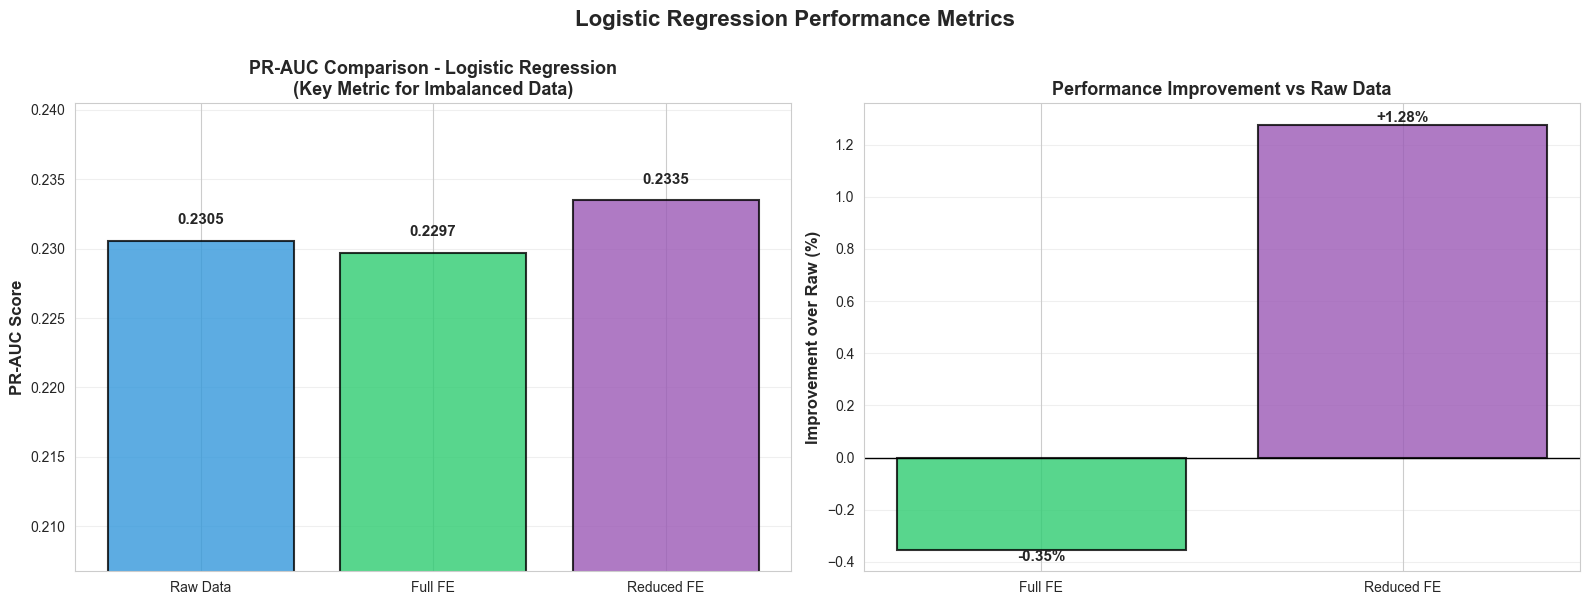

✅ Performance metrics bar chart for logistic regression plotted and saved


In [73]:
# Bar chart for logistic regression performance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

approaches_logit = ['Raw Data', 'Full FE', 'Reduced FE']
pr_aucs_logit = [avg_precision_raw, avg_precision_fe, avg_prec_reduced]
colors_bar = ['#3498db', '#2ecc71', '#9b59b6']

# PR-AUC comparison
axes[0].bar(approaches_logit, pr_aucs_logit, color=colors_bar, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[0].set_ylabel('PR-AUC Score', fontsize=12, fontweight='bold')
axes[0].set_title('PR-AUC Comparison - Logistic Regression\n(Key Metric for Imbalanced Data)', fontsize=13, fontweight='bold')
axes[0].set_ylim([min(pr_aucs_logit) * 0.90, max(pr_aucs_logit) * 1.03])
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(pr_aucs_logit):
    axes[0].text(i, v + 0.001, f'{v:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Improvement over raw
improvements_logit = [(avg_precision_fe - avg_precision_raw) / avg_precision_raw * 100,
                      (avg_prec_reduced - avg_precision_raw) / avg_precision_raw * 100]
x_pos = np.arange(2)
bars = axes[1].bar(x_pos, improvements_logit, color=['#2ecc71', '#9b59b6'], alpha=0.8, edgecolor='black', linewidth=1.5)
axes[1].set_ylabel('Improvement over Raw (%)', fontsize=12, fontweight='bold')
axes[1].set_title('Performance Improvement vs Raw Data', fontsize=13, fontweight='bold')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(['Full FE', 'Reduced FE'])
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[1].grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:+.2f}%', ha='center', va='bottom' if height > 0 else 'top',
                fontweight='bold', fontsize=11)

plt.suptitle('Logistic Regression Performance Metrics', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('performance_logistic_barchart.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Performance metrics bar chart for logistic regression plotted and saved")